# <b>PROJECT NAME : BANK GOOD CREDIT (PR-0015)

### <b>CONTRIBUTION
<b>

    - SIDDHESHWAR KOLI

## <B>PROJECT SUMMARY
<B>
    
     This project aims to predict which customers at Bank GoodCredit are at risk of having bad credit.
     By analyzing customer account, enquiry, and demographic data, the goal is to identify key factors that impact credit risk.
     The model will help the bank reduce bad debt and make better decisions about who to offer credit to.
     The model's performance will be measured using Gini and rank ordering.

## <B>PROBLEM STATEMENT

### <B>OBJECTIVE
    - The objective of this project is to develop a machine learning model that predicts whether a customer has good or bad credit history based on their account details, enquiry data, and demographics.

    - TARGET VARIABLE : Bad_label
        - 0 → Good Credit History (Customer pays on time)
        - 1 → Bad Credit History ((falls into 30 DPD + bucket)

    - Key Metric: Gini Coefficient (Measures how well the model differentiates good vs. bad customers)
    - Current Benchmark: Gini Score = 37.9 (We need to improve this)

### <B>WHY IS THIS IMPORTANT ?
    - Helps the bank make better lending decisions.
    - Reduces the risk of bad loans and financial losses.
    - Improves customer segmentation based on creditworthiness.

### <B>IMPORTING ALL THE REQUIRED LIBRARIES

In [1]:
#!pip install mysql-connector-python


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,f1_score,roc_auc_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

import pickle
import math
from collections import Counter
from imblearn.over_sampling import SMOTE

import os
import mysql.connector

### <B>IMPORTING REQUIRED PACKAGES

In [3]:
!pip install pandas mysql-connector-python
!pip install pymysql
!pip install mysql-connector

In [4]:
host = '18.136.157.135'
port = 3306
username = 'dm_team1'
password = 'DM!$Team&279@20!'
database = 'project_banking'

### <B>ESTABLISH THE CONNECTION

In [5]:
connection=mysql.connector.connect(
    host=host,
    port=port,
    user=username,
    password=password,
    database=database
)

# Check if the connection is successful
if connection.is_connected():
    print("Successfully connected to the database")
else:
    print("Failed to connect to the database")

Successfully connected to the database


### <B>CHECK NUMBER OF TABLES PRESENT IN DATABASE

In [6]:
##Finding the number of tables present in the database
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


### <b>LOADING THE TABLES

In [7]:
cust_Account_df=pd.read_sql_query('select * from Cust_Account',connection)

Cust_Demographics_df=pd.read_sql_query('select * from Cust_Demographics',connection)

Cust_Enquiry_df=pd.read_sql_query('select * from Cust_Enquiry',connection)

<b>Now We have loaded all the files here now we will analyze one by one datasetm

### <B>ANALYZING THE CUSTOMER ACCOUNT DATASET

In [8]:
cust_Account_df

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0       10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1       10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2       10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   
3       20-Jul-15       15606  09-Jul-15        10           1  13-Jan-06   
4       20-Jul-15       15606  09-Jul-15         6           1  18-Jan-15   
...           ...         ...        ...       ...         ...        ...   
186324  11-Jun-15        1611  25-May-15        10           1  02-May-07   
186325  11-Jun-15        1611  25-May-15        10           1  11-Apr-07   
186326  11-Jun-15        1611  25-May-15        10           1  20-Nov-06   
186327  11-Jun-15        1611  25-May-15        10           1  17-Oct-06   
186328  11-Jun-15        1611  25-May-15         6           1  29-Nov-05   

       last_paymt_dt  closed_dt reporting_dt high_credit_amt  ...  \
0          30-Jun-14  05-Jul-14    30-Sep-15           20900  ...   
1          06-Sep-15               03-Oct-15           16201  ...   
2          31-Aug-15               30-Sep-15           41028  ...   
3                     26-Jul-07    31-Jan-09           93473  ...   
4          05-May-15               31-May-15           20250  ...   
...              ...        ...          ...             ...  ...   
186324     21-Apr-15               30-Apr-15           24228  ...   
186325     22-Jun-09  02-Apr-10    30-Apr-15           19584  ...   
186326                12-Apr-12    31-Dec-13           50844  ...   
186327                07-Mar-12    15-Apr-15           35587  ...   
186328                31-Dec-08    11-Jun-10           26000  ...   

       amt_past_due                                    paymenthistory1  \
0                    """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1                    """0000000000000000000000000000000000000000000...   
2                    """0000000000000000000000000000000000000000000...   
3                    """1200900600600600300000000000000000000000000...   
4                                                """000000000000000"""   
...             ...                                                ...   
186324               """0000000000000000000000000000000000000000000...   
186325                               """000179146119089058029000XXX"""   
186326               """000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
186327               """000010000000000000000000000000000XXXXXXXXXX...   
186328               """000000000000000000000000000XXXXXXXXXXXXXXX0...   

                                          paymenthistory2 paymt_str_dt  \
0                                                            01-Sep-15   
1       """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2       """0000000000000000000000000000000000000000000...    01-Sep-15   
3                                                            01-Jul-07   
4                                                            01-May-15   
...                                                   ...          ...   
186324  """0000000000000000000000000000000000000000000...    01-Apr-15   
186325                                                       01-Apr-10   
186326                                                       01-Apr-12   
186327  """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Mar-12   
186328                                                       01-Dec-08   

       paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0         01-Jul-14                                                         
1         01-Nov-12       14000      1400                               3   
2         01-Oct-12                                                         
3         01-Feb-06                                                         
4         01-Jan-15                                                         
...           

### <B>FEATURE OVERVIEW
##### <B>AS WE SEE THIS TABLE CONTAIN CUSTOMERS FINANCIAL DATA AND PAYMENT HISTORY.
<B>

    
     1) dt_opened:
        - The date when the account was first opened.
        
     2) customer_no:
        - A unique identifier for each customer.
        
     3) upload_dt:
        - The date when the data was uploaded to the system.
        
     4) acct_type:
         - Type of the account (e.g., savings, checking).
         
     5) owner_indic:
         - Indicates whether the account is owned by the customer (e.g., "Y" for yes, "N" for no).
         
     6) opened_dt:
         - Another column showing the account opening date (similar to dt_opened).
         
     7) last_paymt_dt:
         - The date when the last payment was made on the account.
         
     8) closed_dt:
         - The date when the account was closed (if applicable).
         
     9) reporting_dt:
        - The date when the account’s information was reported or updated.
        
     10) high_credit_amt:
         - The highest credit limit or amount extended to the customer.
         
     11) cur_balance_amt:
         - The current balance in the account (how much the customer owes at the moment).
         
     12) amt_past_due:
         - The amount the customer owes that is overdue.
         
     13) paymenthistory1:
         - A history of payments made on the account during a specific period.
         
     14) paymenthistory2:
         - Another record of payment history for the account during a different period.
         
     15) paymt_str_dt:
         - The start date of the payment period.
         
     16) paymt_end_dt:
         - The end date of the payment period.
         
     17) creditlimit:
         - The maximum amount of credit that the customer can borrow or use on the account.
         
     18) cashlimit:
         - The maximum cash withdrawal limit on the account.
         
     19) rateofinterest:
         - The interest rate applied to the account balance.
         
     20) paymentfrequency:
         - The frequency at which payments are due (e.g., monthly, quarterly).
         
     21) actualpaymentamount:
         - The actual amount paid by the customer in the payment period.

### <B>BASIC CHECKS

<B>CHECK TOP 3 ROWS

In [9]:
cust_Account_df.head(3)

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0  10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1  10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2  10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt  ... amt_past_due  \
0     30-Jun-14  05-Jul-14    30-Sep-15           20900  ...                
1     06-Sep-15               03-Oct-15           16201  ...                
2     31-Aug-15               30-Sep-15           41028  ...                

                                     paymenthistory1  \
0  """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1  """0000000000000000000000000000000000000000000...   
2  """0000000000000000000000000000000000000000000...   

                                     paymenthistory2 paymt_str_dt  \
0                                                       01-Sep-15   
1  """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2  """0000000000000000000000000000000000000000000...    01-Sep-15   

  paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0    01-Jul-14                                                         
1    01-Nov-12       14000      1400                               3   
2    01-Oct-12                                                         

  actualpaymentamount  
0                      
1                5603  
2                      

[3 rows x 21 columns]

<B>CHECK BOTTOM 3 ROWS

In [10]:
cust_Account_df.tail(3)

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
186326  11-Jun-15        1611  25-May-15        10           1  20-Nov-06   
186327  11-Jun-15        1611  25-May-15        10           1  17-Oct-06   
186328  11-Jun-15        1611  25-May-15         6           1  29-Nov-05   

       last_paymt_dt  closed_dt reporting_dt high_credit_amt  ...  \
186326                12-Apr-12    31-Dec-13           50844  ...   
186327                07-Mar-12    15-Apr-15           35587  ...   
186328                31-Dec-08    11-Jun-10           26000  ...   

       amt_past_due                                    paymenthistory1  \
186326               """000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...   
186327               """000010000000000000000000000000000XXXXXXXXXX...   
186328               """000000000000000000000000000XXXXXXXXXXXXXXX0...   

                                          paymenthistory2 paymt_str_dt  \
186326                                                       01-Apr-12   
186327  """XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...    01-Mar-12   
186328                                                       01-Dec-08   

       paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
186326    01-Dec-10                                                     3   
186327    01-Apr-09       15000      6000                               3   
186328    01-Oct-07                                                         

       actualpaymentamount  
186326                      
186327                      
186328                      

[3 rows x 21 columns]

<B>CHECK INFORMATION ABOUT DATASET

In [11]:
cust_Account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dt_opened            186329 non-null  object
 1   customer_no          186329 non-null  object
 2   upload_dt            186329 non-null  object
 3   acct_type            186329 non-null  object
 4   owner_indic          186329 non-null  object
 5   opened_dt            186329 non-null  object
 6   last_paymt_dt        186329 non-null  object
 7   closed_dt            186329 non-null  object
 8   reporting_dt         186329 non-null  object
 9   high_credit_amt      186329 non-null  object
 10  cur_balance_amt      186329 non-null  object
 11  amt_past_due         186329 non-null  object
 12  paymenthistory1      186329 non-null  object
 13  paymenthistory2      186329 non-null  object
 14  paymt_str_dt         186329 non-null  object
 15  paymt_end_dt         186329 non-nu

<B>OBSERVATION

    - As we can observe, all the columns in the dataset are of the object data type.
    - We need to convert them into their appropriate data formats for proper analysis. Specifically:

    - Date columns should be converted to the datetime format to allow for accurate time-based calculations and comparisons.
    - Categorical columns need to be transformed into numerical values (e.g. through encoding techniques like one-hot encoding or label encoding) to ensure that they can be effectively used in machine learning models.

<B>DISPLAY ALL COLUMNS

In [12]:
# DISPLAY ALL COLUMNS
pd.set_option('display.max_columns',None)

In [13]:
cust_Account_df.head(3)

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
0  10-Nov-15       12265  20-Oct-15         6           1  09-Jun-13   
1  10-Nov-15       12265  20-Oct-15        10           1  25-May-12   
2  10-Nov-15       12265  20-Oct-15        10           1  22-Mar-12   

  last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
0     30-Jun-14  05-Jul-14    30-Sep-15           20900               0   
1     06-Sep-15               03-Oct-15           16201           10390   
2     31-Aug-15               30-Sep-15           41028           34420   

  amt_past_due                                    paymenthistory1  \
0               """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1               """0000000000000000000000000000000000000000000...   
2               """0000000000000000000000000000000000000000000...   

                                     paymenthistory2 paymt_str_dt  \
0                                                       01-Sep-15   
1  """000000000000000000000000000XXX0000000000000...    01-Oct-15   
2  """0000000000000000000000000000000000000000000...    01-Sep-15   

  paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
0    01-Jul-14                                                         
1    01-Nov-12       14000      1400                               3   
2    01-Oct-12                                                         

  actualpaymentamount  
0                      
1                5603  
2

<B>CHECKING SIZE AND SHAPE OF DATASET

In [14]:
print(f" Shape of Data {cust_Account_df.shape}")
print(f" Size of Data {cust_Account_df.size}")

 Shape of Data (186329, 21)
 Size of Data 3912909


<b>CHECK NULL VALUES COUNT 

In [15]:
null_count = sum(cust_Account_df.isnull().any())

print("There are {} NULL values in the dataframe".format(null_count))

There are 0 NULL values in the dataframe


<B>CHECK STATISTICAL INFORMATION

In [16]:
cust_Account_df.describe()

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
count      186329      186329     186329    186329      186329     186329   
unique        197       23896         75        31           4       6246   
top     16-Nov-15        8516  21-Apr-15        10           1  13-Apr-12   
freq         4643         120       5128    100239      177287        514   

       last_paymt_dt closed_dt reporting_dt high_credit_amt cur_balance_amt  \
count         186329    186329       186329          186329          186329   
unique          4511      4840         1877           67555           56425   
top                               31-Jul-15                               0   
freq           25487    109075        12654            8875           89872   

       amt_past_due                                    paymenthistory1  \
count        186329                                             186329   
unique          630                                              18311   
top                  """0000000000000000000000000000000000000000000...   
freq         185453                                              44979   

       paymenthistory2 paymt_str_dt paymt_end_dt creditlimit cashlimit  \
count           186329       186329       186329      186329    186329   
unique           11912          234          235        1380      1456   
top                       01-Jul-15    01-Jan-15                         
freq            107824        16747         5640      137477    151047   

       rateofinterest paymentfrequency actualpaymentamount  
count          186329           186329              186329  
unique           1476                3               18300  
top                                                         
freq           161496           122436              145276

<B>OBSERVATION

    As we have observed, some columns contain empty values, and these should be converted to 'null' values for proper handling during data processing.

<B>CHECKING EMPTY CELLS

In [17]:
cust_Account_df = cust_Account_df.applymap(lambda x: pd.NA if x == "" else x)

In [18]:
cust_Account_df.describe()

dt_opened customer_no  upload_dt acct_type owner_indic  opened_dt  \
count      186329      186329     186329    186329      186329     185874   
unique        197       23896         75        31           4       6245   
top     16-Nov-15        8516  21-Apr-15        10           1  13-Apr-12   
freq         4643         120       5128    100239      177287        514   

       last_paymt_dt  closed_dt reporting_dt high_credit_amt cur_balance_amt  \
count         160842      77254       186329          177454          186329   
unique          4510       4839         1877           67554           56425   
top        05-Mar-15  05-Mar-12    31-Jul-15          100000               0   
freq            1739        353        12654            3976           89872   

       amt_past_due                                    paymenthistory1  \
count           876                                             186329   
unique          629                                              18311   
top             400  """0000000000000000000000000000000000000000000...   
freq             43                                              44979   

                                          paymenthistory2 paymt_str_dt  \
count                                               78505       186328   
unique                                              11911          233   
top     """0000000000000000000000000000000000000000000...    01-Jul-15   
freq                                                18956        16747   

       paymt_end_dt creditlimit cashlimit rateofinterest paymentfrequency  \
count        186328       48852     35282          24833            63893   
unique          234        1379      1455           1475                2   
top       01-Jan-15       50000     10000             39                3   
freq           5640        2561      3827           5025            63772   

       actualpaymentamount  
count                41053  
unique               18299  
top                   5000  
freq                   507

<B>CHECK DATATYPE OF ALL COLUMNS

In [19]:
cust_Account_df.dtypes

dt_opened              object
customer_no            object
upload_dt              object
acct_type              object
owner_indic            object
opened_dt              object
last_paymt_dt          object
closed_dt              object
reporting_dt           object
high_credit_amt        object
cur_balance_amt        object
amt_past_due           object
paymenthistory1        object
paymenthistory2        object
paymt_str_dt           object
paymt_end_dt           object
creditlimit            object
cashlimit              object
rateofinterest         object
paymentfrequency       object
actualpaymentamount    object
dtype: object

<B>OBSERVATION

    - As we can observe, all the columns in the dataset are of the object data type.
    - We need to convert them into their appropriate data formats for proper analysis. Specifically:

    - Date columns should be converted to the datetime format to allow for accurate time-based calculations and comparisons.
    - Categorical columns need to be transformed into numerical values (e.g., through encoding techniques like one-hot encoding or label encoding) to ensure that they can be effectively used in machine learning models.

<B>CONVERTING OBJECT INTO THEIR APPROPRIATE DATATYPE

In [20]:
# Convert date columns to datetime format
date_columns = ['dt_opened', 'opened_dt', 'last_paymt_dt', 'closed_dt', 'reporting_dt','upload_dt','paymt_str_dt','paymt_end_dt']
cust_Account_df[date_columns] = cust_Account_df[date_columns].apply(pd.to_datetime)

# Convert numerical columns to float or int format
numeric_columns = ['high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'creditlimit', 'cashlimit', 'rateofinterest', 'actualpaymentamount','paymentfrequency','acct_type','owner_indic','customer_no']
cust_Account_df[numeric_columns] = cust_Account_df[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [21]:
# Again Check DataTypes 
print(cust_Account_df.dtypes)

dt_opened              datetime64[ns]
customer_no                     int64
upload_dt              datetime64[ns]
acct_type                       int64
owner_indic                     int64
opened_dt              datetime64[ns]
last_paymt_dt          datetime64[ns]
closed_dt              datetime64[ns]
reporting_dt           datetime64[ns]
high_credit_amt               float64
cur_balance_amt                 int64
amt_past_due                  float64
paymenthistory1                object
paymenthistory2                object
paymt_str_dt           datetime64[ns]
paymt_end_dt           datetime64[ns]
creditlimit                   float64
cashlimit                     float64
rateofinterest                float64
paymentfrequency              float64
actualpaymentamount           float64
dtype: object


<B>CHECKING UNIQUE VALUES FOR EACH COLUMN

In [22]:
cust_Account_df.nunique()

dt_opened                197
customer_no            23896
upload_dt                 75
acct_type                 31
owner_indic                4
opened_dt               6245
last_paymt_dt           4510
closed_dt               4839
reporting_dt            1877
high_credit_amt        67554
cur_balance_amt        56425
amt_past_due             629
paymenthistory1        18311
paymenthistory2        11911
paymt_str_dt             233
paymt_end_dt             234
creditlimit             1379
cashlimit               1455
rateofinterest          1472
paymentfrequency           2
actualpaymentamount    18299
dtype: int64

<B>CHECKING DUPLICATES

In [23]:
# Check the number of duplicated rows

duplicates = cust_Account_df.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

Number of duplicated rows: 2401


<B>DROP DUPLICATES

In [24]:
#Drop duplicated rows

cust_Account_df = cust_Account_df.drop_duplicates()

In [25]:
# Verify that duplicates are removed

print(f"Number of duplicated rows after drop: {cust_Account_df.duplicated().sum()}")

Number of duplicated rows after drop: 0


<B>OBSERVATION

    All the duplicated values are removed

<B>CHECK SIZE AND SHAPE

In [26]:
print(f" Shape of Data {cust_Account_df.shape}")
print(f" Size of Data {cust_Account_df.size}")

 Shape of Data (183928, 21)
 Size of Data 3862488


### <B>EXPLORATORY DATA ANALYSIS FOR  'Cust_Account' TABLE

<B>DISTRIBUTION GRAPH

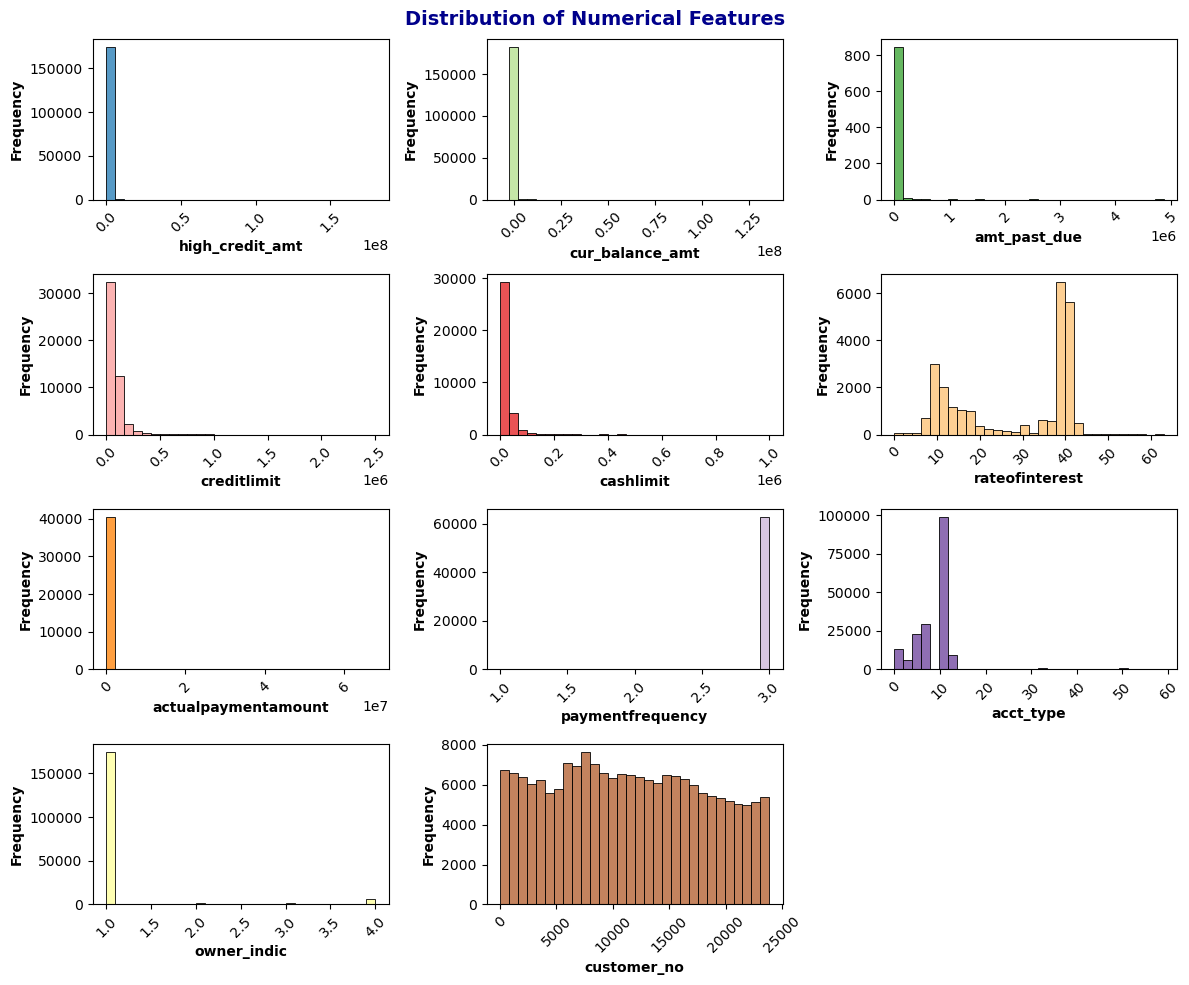

In [27]:
plt.figure(figsize=(12, 10))
plot = 1  # Start subplot index

for col in numeric_columns:
    if plot <= len(numeric_columns):  # Ensure we don't exceed the available subplots
        ax = plt.subplot(4, 3, plot)
        color = plt.cm.Paired(plot / len(numeric_columns))          
        sns.histplot(cust_Account_df[col], bins=30, color=color, edgecolor='black')  
        plt.xlabel(col, fontsize=10, fontweight='bold', color='black')
        plt.ylabel('Frequency', fontsize=10, fontweight='bold', color='black')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plot += 1

plt.suptitle('Distribution of Numerical Features', fontsize=14, fontweight='bold', color='darkblue')
plt.tight_layout()
plt.show()

In [28]:
print(cust_Account_df.columns)

Index(['dt_opened', 'customer_no', 'upload_dt', 'acct_type', 'owner_indic',
       'opened_dt', 'last_paymt_dt', 'closed_dt', 'reporting_dt',
       'high_credit_amt', 'cur_balance_amt', 'amt_past_due', 'paymenthistory1',
       'paymenthistory2', 'paymt_str_dt', 'paymt_end_dt', 'creditlimit',
       'cashlimit', 'rateofinterest', 'paymentfrequency',
       'actualpaymentamount'],
      dtype='object')


<B>OBSERVATION
    
    - Most numerical features are highly skewed
    - Outliers present in this dataset 

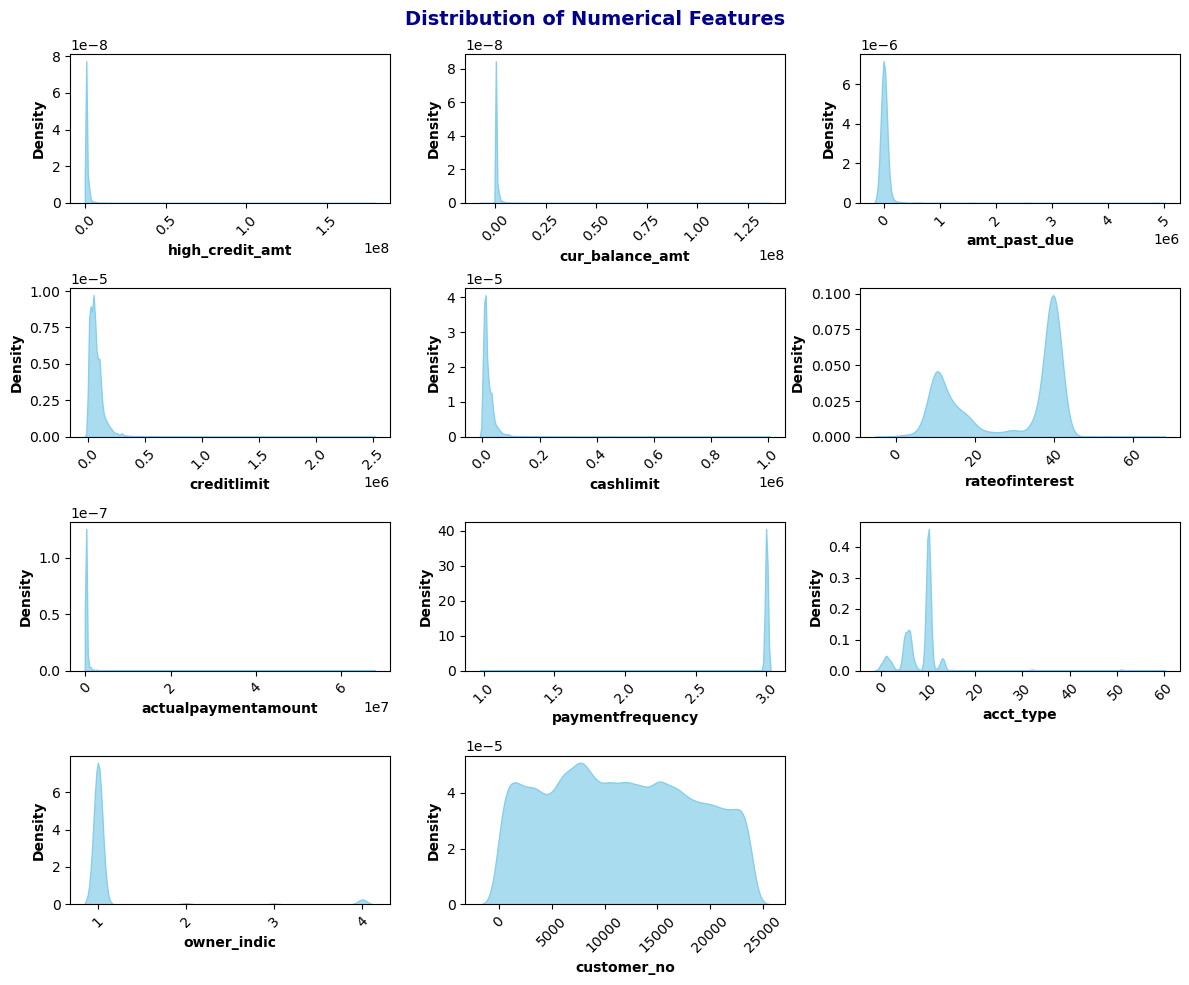

In [29]:
plt.figure(figsize=(12, 10))
plot = 1  # Start subplot index

for col in numeric_columns:
    if plot <= len(numeric_columns):  # Ensure we don't exceed the available subplots
        ax = plt.subplot(4, 3, plot)
        sns.kdeplot(cust_Account_df[col], fill=True, color='skyblue', alpha=0.7)  
        plt.xlabel(col, fontsize=10, fontweight='bold', color='black')
        plt.ylabel('Density', fontsize=10, fontweight='bold', color='black')
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plot += 1
plt.suptitle('Distribution of Numerical Features', fontsize=14, fontweight='bold', color='darkblue')
plt.tight_layout()
plt.show()

<B>HISTPLOT FOR DATETIME COLUMNS

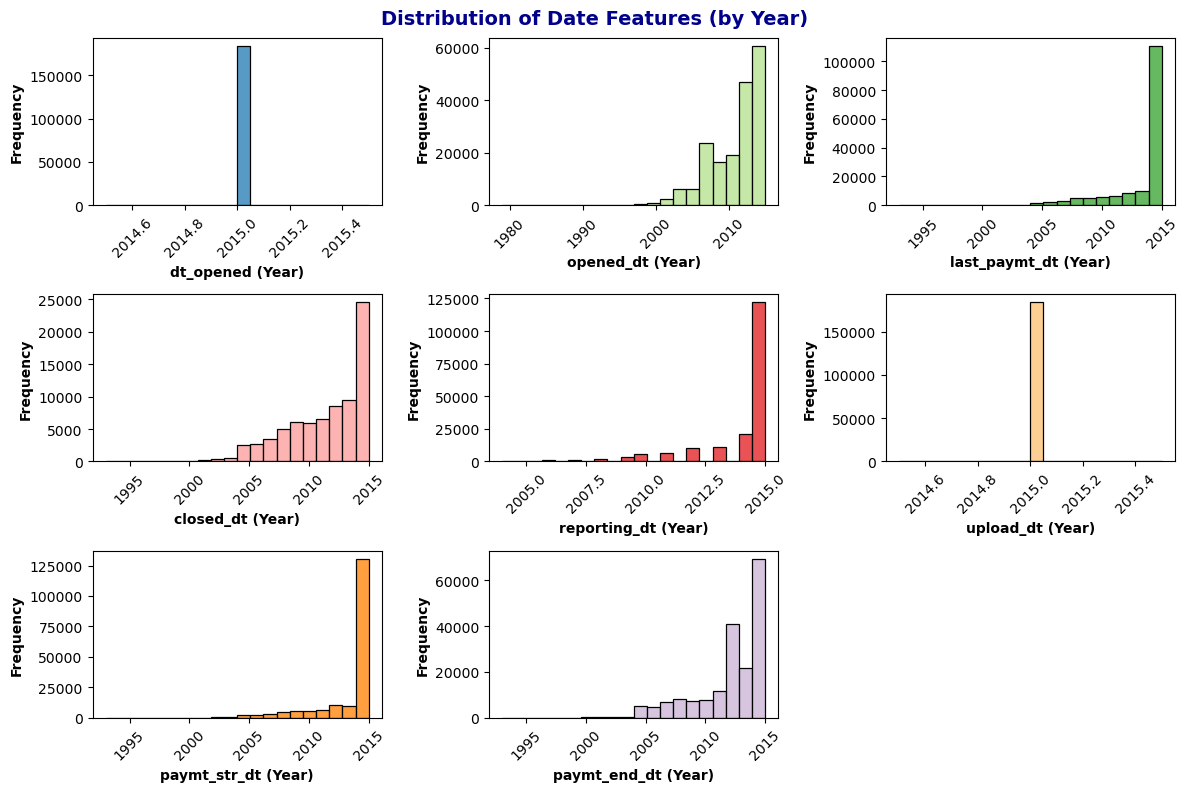

In [30]:
plt.figure(figsize=(12, 10))
plot = 1  # Start subplot index
colors = plt.cm.Paired.colors  # Get a colormap with different colors

for col in date_columns:
    if plot <= len(date_columns):  # Ensure we don't exceed the available subplots
        ax = plt.subplot(4, 3, plot)
        color = colors[plot % len(colors)]
        sns.histplot(cust_Account_df[col].dt.year.dropna(), bins=20, kde=False, color=color, edgecolor='black')        
        plt.xlabel(f'{col} (Year)', fontsize=10, fontweight='bold', color='black')
        plt.ylabel('Frequency', fontsize=10, fontweight='bold', color='black')
        plt.xticks(rotation=45)
        plot += 1

plt.suptitle('Distribution of Date Features (by Year)', fontsize=14, fontweight='bold', color='darkblue')
plt.tight_layout()
plt.show()

<B>OBSERVATION
    
    - 2015 had the most account openings, likely due to a campaign or policy change.
    - 48% of accounts have zero balance, meaning loans are paid off or inactive.
    - High credit amounts & balances are very skewed, with a few very high-value customers.
    - Higher interest rates (-0.20 correlation) are given to riskier customers.
    - Most payments happen monthly, showing disciplined financial behavior.
    - Less than 1% of accounts have overdue payments, indicating responsible payers.
    - Missing data: 74% of credit limits & 81% of cash limits, affecting risk analysis.
    - 31 account types exist, but 2% are dormant/inactive.
    - Higher credit limits strongly correlate (0.77, 0.72) with higher balances.

### <b>DATA PREPROCESSING FOR TABLE 'Cust_Account'

In [31]:
cust_Account_df.apply(lambda col: print(f"======= {col.name} ========\n{col.value_counts()}\n"))

======= dt_opened ========
dt_opened
2015-11-16    4627
2015-12-21    2386
2015-08-18    2132
2015-10-13    2062
2015-10-26    1996
              ... 
2015-04-22      36
2015-04-18      18
2015-10-24       8
2015-04-16       2
2015-04-21       2
Name: count, Length: 197, dtype: int64

======= customer_no ========
customer_no
8814     76
11922    71
8872     68
51       66
18936    65
         ..
19104     1
10266     1
137       1
1068      1
15270     1
Name: count, Length: 23896, dtype: int64

======= upload_dt ========
upload_dt
2015-04-21    4938
2015-10-23    3563
2015-07-16    3492
2015-10-20    3483
2015-08-20    3277
              ... 
2015-12-17    1026
2015-12-24     333
2015-12-28     106
2015-12-31      53
2015-11-29      36
Name: count, Length: 75, dtype: int64

======= acct_type ========
acct_type
10    99102
6     25252
5     22629
1      9291
13     8478
2      5577
7      4163
0      3891
12     1188
32      735
51      719
3       666
15      493
17      412
8       4

dt_opened              None
customer_no            None
upload_dt              None
acct_type              None
owner_indic            None
opened_dt              None
last_paymt_dt          None
closed_dt              None
reporting_dt           None
high_credit_amt        None
cur_balance_amt        None
amt_past_due           None
paymenthistory1        None
paymenthistory2        None
paymt_str_dt           None
paymt_end_dt           None
creditlimit            None
cashlimit              None
rateofinterest         None
paymentfrequency       None
actualpaymentamount    None
dtype: object

In [32]:
cust_Account_df.head()

dt_opened  customer_no  upload_dt  acct_type  owner_indic  opened_dt  \
0 2015-11-10        12265 2015-10-20          6            1 2013-06-09   
1 2015-11-10        12265 2015-10-20         10            1 2012-05-25   
2 2015-11-10        12265 2015-10-20         10            1 2012-03-22   
3 2015-07-20        15606 2015-07-09         10            1 2006-01-13   
4 2015-07-20        15606 2015-07-09          6            1 2015-01-18   

  last_paymt_dt  closed_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0    2014-06-30 2014-07-05   2015-09-30          20900.0                0   
1    2015-09-06        NaT   2015-10-03          16201.0            10390   
2    2015-08-31        NaT   2015-09-30          41028.0            34420   
3           NaT 2007-07-26   2009-01-31          93473.0                0   
4    2015-05-05        NaT   2015-05-31          20250.0            13500   

   amt_past_due                                    paymenthistory1  \
0           NaN  """STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...   
1           NaN  """0000000000000000000000000000000000000000000...   
2           NaN  """0000000000000000000000000000000000000000000...   
3           NaN  """1200900600600600300000000000000000000000000...   
4           NaN                              """000000000000000"""   

                                     paymenthistory2 paymt_str_dt  \
0                                               <NA>   2015-09-01   
1  """000000000000000000000000000XXX0000000000000...   2015-10-01   
2  """0000000000000000000000000000000000000000000...   2015-09-01   
3                                               <NA>   2007-07-01   
4                                               <NA>   2015-05-01   

  paymt_end_dt  creditlimit  cashlimit  rateofinterest  paymentfrequency  \
0   2014-07-01          NaN        NaN             NaN               NaN   
1   2012-11-01      14000.0     1400.0             NaN               3.0   
2   2012-10-01          NaN        NaN             NaN               NaN   
3   2006-02-01          NaN        NaN             NaN               NaN   
4   2015-01-01          NaN        NaN             NaN               NaN   

   actualpaymentamount  
0                  NaN  
1               5603.0  
2                  NaN  
3                  NaN  
4                  NaN

In [33]:
cust_Account_df.isnull().sum()

dt_opened                   0
customer_no                 0
upload_dt                   0
acct_type                   0
owner_indic                 0
opened_dt                 426
last_paymt_dt           25095
closed_dt              107775
reporting_dt                0
high_credit_amt          8718
cur_balance_amt             0
amt_past_due           183063
paymenthistory1             0
paymenthistory2        106395
paymt_str_dt                1
paymt_end_dt                1
creditlimit            135629
cashlimit              149025
rateofinterest         159418
paymentfrequency       120801
actualpaymentamount    143343
dtype: int64

In [34]:
cust_Account_df.isnull().sum() / len(cust_Account_df) * 100

dt_opened               0.000000
customer_no             0.000000
upload_dt               0.000000
acct_type               0.000000
owner_indic             0.000000
opened_dt               0.231612
last_paymt_dt          13.643926
closed_dt              58.596299
reporting_dt            0.000000
high_credit_amt         4.739898
cur_balance_amt         0.000000
amt_past_due           99.529707
paymenthistory1         0.000000
paymenthistory2        57.846005
paymt_str_dt            0.000544
paymt_end_dt            0.000544
creditlimit            73.740268
cashlimit              81.023553
rateofinterest         86.674133
paymentfrequency       65.678418
actualpaymentamount    77.934300
dtype: float64

<b>OBSERVATION

    - Drop all date columns except "opened_dt" since they don’t impact the target.
    - "owner_indic" most users operate their own accounts, making it unnecessary.
    - "amt_past_due" has 99% missing values, so it doesn’t add useful information.
    - "paymenthistory1" is repetitive and irrelevant, so it can be removed.
    - "paymenthistory2" has 57% missing values, making it unreliable for analysis.
    - "creditlimit" is missing in 73% of cases, so it lacks enough data for insights.
    - "cashlimit" is missing in 81% of entries, making it unusable.
    - "rateofinterest" has 86% missing values, so it’s not practical for modeling.
    - "paymentfrequency" has 65% missing data, reducing its usefulness.
    - "actualpaymentamount" is missing in 77% of cases, so it doesn’t add much value.
    - Removing "owner_indic" improves dataset efficiency as it’s skewed, redundant, and has low business impact.

<B>DROPPING UNWANTED COLUMN

In [35]:
data1=cust_Account_df[['owner_indic','amt_past_due','paymenthistory1','paymenthistory2','creditlimit',
              'cashlimit','rateofinterest','paymentfrequency','actualpaymentamount']]

In [36]:
cust_Account_df.drop(columns=data1,inplace=True,axis=1)

In [37]:
cust_Account_df.head(3)

dt_opened  customer_no  upload_dt  acct_type  opened_dt last_paymt_dt  \
0 2015-11-10        12265 2015-10-20          6 2013-06-09    2014-06-30   
1 2015-11-10        12265 2015-10-20         10 2012-05-25    2015-09-06   
2 2015-11-10        12265 2015-10-20         10 2012-03-22    2015-08-31   

   closed_dt reporting_dt  high_credit_amt  cur_balance_amt paymt_str_dt  \
0 2014-07-05   2015-09-30          20900.0                0   2015-09-01   
1        NaT   2015-10-03          16201.0            10390   2015-10-01   
2        NaT   2015-09-30          41028.0            34420   2015-09-01   

  paymt_end_dt  
0   2014-07-01  
1   2012-11-01  
2   2012-10-01

In [38]:
cust_Account_df.shape

(183928, 12)

In [39]:
cust_Account_df.isna().sum()

dt_opened               0
customer_no             0
upload_dt               0
acct_type               0
opened_dt             426
last_paymt_dt       25095
closed_dt          107775
reporting_dt            0
high_credit_amt      8718
cur_balance_amt         0
paymt_str_dt            1
paymt_end_dt            1
dtype: int64

<b>DROPPING 'closed_dt' COLUMN BECAUSE IT HAS MISSING VALUES MORE THAN 60%

In [40]:
cust_Account_df.drop('closed_dt',axis=1,inplace=True)

In [41]:
cust_Account_df["high_credit_amt"] = cust_Account_df["high_credit_amt"].fillna(cust_Account_df["high_credit_amt"].median())

In [42]:
cust_Account_df.head(3)

dt_opened  customer_no  upload_dt  acct_type  opened_dt last_paymt_dt  \
0 2015-11-10        12265 2015-10-20          6 2013-06-09    2014-06-30   
1 2015-11-10        12265 2015-10-20         10 2012-05-25    2015-09-06   
2 2015-11-10        12265 2015-10-20         10 2012-03-22    2015-08-31   

  reporting_dt  high_credit_amt  cur_balance_amt paymt_str_dt paymt_end_dt  
0   2015-09-30          20900.0                0   2015-09-01   2014-07-01  
1   2015-10-03          16201.0            10390   2015-10-01   2012-11-01  
2   2015-09-30          41028.0            34420   2015-09-01   2012-10-01

<b>OBSERVATION
    
    - Now that all unwanted columns have been removed, we will proceed with dropping null values from the dataset.

<B>DROP NULL VALUES FROM TABLE

In [43]:
cust_Account_df=cust_Account_df.dropna()

In [44]:
cust_Account_df.isnull().sum()

dt_opened          0
customer_no        0
upload_dt          0
acct_type          0
opened_dt          0
last_paymt_dt      0
reporting_dt       0
high_credit_amt    0
cur_balance_amt    0
paymt_str_dt       0
paymt_end_dt       0
dtype: int64

<b>OBSERVATION
    
    - Here all the null values present in this table has been replaced 

In [45]:
cust_Account_df

dt_opened  customer_no  upload_dt  acct_type  opened_dt last_paymt_dt  \
0      2015-11-10        12265 2015-10-20          6 2013-06-09    2014-06-30   
1      2015-11-10        12265 2015-10-20         10 2012-05-25    2015-09-06   
2      2015-11-10        12265 2015-10-20         10 2012-03-22    2015-08-31   
4      2015-07-20        15606 2015-07-09          6 2015-01-18    2015-05-05   
5      2015-07-20        15606 2015-07-09          6 2015-01-14    2015-05-02   
...           ...          ...        ...        ...        ...           ...   
186321 2015-06-11         1611 2015-05-25          5 2008-04-29    2011-07-30   
186322 2015-06-11         1611 2015-05-25          5 2007-10-08    2010-11-20   
186323 2015-06-11         1611 2015-05-25         10 2007-05-30    2012-09-05   
186324 2015-06-11         1611 2015-05-25         10 2007-05-02    2015-04-21   
186325 2015-06-11         1611 2015-05-25         10 2007-04-11    2009-06-22   

       reporting_dt  high_credit_amt  cur_balance_amt paymt_str_dt  \
0        2015-09-30          20900.0                0   2015-09-01   
1        2015-10-03          16201.0            10390   2015-10-01   
2        2015-09-30          41028.0            34420   2015-09-01   
4        2015-05-31          20250.0            13500   2015-05-01   
5        2015-05-31          20000.0             8000   2015-05-01   
...             ...              ...              ...          ...   
186321   2011-07-31         130000.0                0   2011-07-01   
186322   2010-11-30          75000.0                0   2010-11-01   
186323   2014-02-28          29516.0                0   2012-09-01   
186324   2015-04-30          24228.0            24228   2015-04-01   
186325   2015-04-30          19584.0                0   2010-04-01   

       paymt_end_dt  
0        2014-07-01  
1        2012-11-01  
2        2012-10-01  
4        2015-01-01  
5        2015-01-01  
...             ...  
186321   2008-08-01  
186322   2008-04-01  
186323   2009-10-01  
186324   2012-05-01  
186325   2009-08-01  

[158764 rows x 11 columns]

#### <B>NOW THE DATA IS CLEANED FULLY AND ALSO THE DATE TIME TYPE VALUES ARE ALSO CHANGED

### <B>ANALYZING THE CUSTOMER DEMOGRAPHICS DATASET

In [46]:
Cust_Demographics_df

dt_opened customer_no entry_time        feature_1  feature_2 feature_3  \
0      18-Apr-15           1  13-Apr-15         Insignia  13-Apr-15       650   
1      21-Apr-15           2  21-Apr-15         Insignia  21-Apr-15       760   
2      22-Apr-15           3  21-Apr-15         Insignia  21-Apr-15       774   
3      25-Apr-15           4  15-Apr-15         Insignia  20-Apr-15       770   
4      06-May-15           5  30-Apr-15         Insignia                        
...          ...         ...        ...              ...        ...       ...   
23891  31-Dec-15       23892  10-Dec-15  Platinum Deligh  10-Dec-15       704   
23892  17-Dec-15       23893  16-Nov-15  Platinum Deligh                        
23893  04-Nov-15       23894  24-Sep-15  Platinum Maxima  24-Sep-15       748   
23894  03-Nov-15       23895  30-Sep-15  Platinum Deligh  30-Sep-15       740   
23895  04-Dec-15       23896  06-Nov-15  Titanium Deligh  06-Nov-15       688   

      feature_4   feature_5 feature_6 feature_7 feature_8 feature_9  \
0             2  Card Setup        14    500000                       
1             1  Card Setup        14   1200000                       
2             1  Card Setup        14    700000                       
3             1  Card Setup        14    500000                       
4             3  Card Setup        14    500000                       
...         ...         ...       ...       ...       ...       ...   
23891         1  Card Setup        14    119000                       
23892         2  Card Setup        14     35000                       
23893         3  Card Setup        14     68000                       
23894         3  Card Setup        14    158000                       
23895         1  Card Setup        14    106000                       

      feature_10 feature_11 feature_12 feature_13 feature_14 feature_15  \
0                         Y        IS1                     0        159   
1                         Y        IS1                     0         91   
2                         Y        IS1                     0         91   
3                         Y        IS1                     0        157   
4                         Y        IS1                     0        100   
...          ...        ...        ...        ...        ...        ...   
23891                     Y        PD1        PD3         12       SA05   
23892                     Y        PD1        PD3         12       SA03   
23893                     Y        PM1                             CD01   
23894                     Y        PD1        PD3         12       SA40   
23895                     Y        TD1                     0       SA03   

      feature_16 feature_17 feature_18 feature_19  feature_20 feature_21  \
0           4284       4284                     1  ADFPNXXXXX  03-Sep-65   
1           B001       4077                     1  AJWPRXXXXX  14-Jul-62   
2           B001       4077                     2  AFAPNXXXXX  10-Apr-66   
3           5107       5107                     1  AAAPDXXXXX  16-Apr-64   
4           D016       4564                     1  ABEPSXXXXX  03-Jan-54   
...          ...        ...        ...        ...         ...        ...   
23891       MA01                                1  CUQPSXXXXX  12-Oct-88   
23892       AS33                                1  DTPPSXXXXX  01-Feb-87   
23893       D066                                1  CPOPSXXXXX  08-Nov-86   
23894       G011                                1  AVZPGXXXXX  24-Nov-82   
23895       AS33                                1  AJIPBXXXXX  15-Aug-83   

       feature_22 feature_23         feature_24 feature_25 feature_26  \
0      98332XXXXX          N    @REDIFFMAIL.COM          1          2   
1      99455XXXXX          N         @GMAIL.COM          1          2   
2      98456XXXXX          N  @SHOBANARAYAN.COM          1          0   
3      98220XXXXX          N          @VSNL.COM          1          3   
4 

### <B>BASIC CHECKS

<B>CHECKING TOP 5 ROWS

In [47]:
Cust_Demographics_df.head()

dt_opened customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15           1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15           2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15           3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15           4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15           5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50           featu

<B>CHECKING BOTTOM 5 ROWS

In [48]:
Cust_Demographics_df.tail()

dt_opened customer_no entry_time        feature_1  feature_2 feature_3  \
23891  31-Dec-15       23892  10-Dec-15  Platinum Deligh  10-Dec-15       704   
23892  17-Dec-15       23893  16-Nov-15  Platinum Deligh                        
23893  04-Nov-15       23894  24-Sep-15  Platinum Maxima  24-Sep-15       748   
23894  03-Nov-15       23895  30-Sep-15  Platinum Deligh  30-Sep-15       740   
23895  04-Dec-15       23896  06-Nov-15  Titanium Deligh  06-Nov-15       688   

      feature_4   feature_5 feature_6 feature_7 feature_8 feature_9  \
23891         1  Card Setup        14    119000                       
23892         2  Card Setup        14     35000                       
23893         3  Card Setup        14     68000                       
23894         3  Card Setup        14    158000                       
23895         1  Card Setup        14    106000                       

      feature_10 feature_11 feature_12 feature_13 feature_14 feature_15  \
23891                     Y        PD1        PD3         12       SA05   
23892                     Y        PD1        PD3         12       SA03   
23893                     Y        PM1                             CD01   
23894                     Y        PD1        PD3         12       SA40   
23895                     Y        TD1                     0       SA03   

      feature_16 feature_17 feature_18 feature_19  feature_20 feature_21  \
23891       MA01                                1  CUQPSXXXXX  12-Oct-88   
23892       AS33                                1  DTPPSXXXXX  01-Feb-87   
23893       D066                                1  CPOPSXXXXX  08-Nov-86   
23894       G011                                1  AVZPGXXXXX  24-Nov-82   
23895       AS33                                1  AJIPBXXXXX  15-Aug-83   

       feature_22 feature_23  feature_24 feature_25 feature_26 feature_27  \
23891  98715XXXXX          N  @YAHOO.COM          2          0   Graduate   
23892  99101XXXXX          N  @GMAIL.COM          2          0   Graduate   
23893  99111XXXXX          Y  @GMAIL.COM          2          0   Graduate   
23894  93100XXXXX          N  @GMAIL.COM          1          0   Graduate   
23895  97178XXXXX          N  @GMAIL.COM          1          0   Graduate   

      feature_28 feature_29 feature_30 feature_31 feature_32 feature_33  \
23891  New Delhi     110045       1988         10      Paren          Y   
23892  New Delhi     110037       2014         12      Rente          N   
23893  New Delhi     110033       1986          0      Paren          Y   
23894  New Delhi     110095       2010          0       Self          Y   
23895  Ghaziabad     201005       2005          0      Paren          Y   

      feature_34 feature_35        feature_36   feature_37         feature_38  \
23891          1      33000  Private Ltd. Co.       Others  SERVICE ASSOCIATE   
23892          1          1  Private Ltd. Co.       Others           ENGINEER   
23893          1          1  Private Ltd. Co.  Health Care     SENIOR ANALYST   
23894          2      25000                                                     
23895          2          1                                                     

      feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
23891       2015          6          0          6    Gurgaon     122001   
23892       2012         12          3          0  New Delhi     110037   
23893       2015          1          3          0    Gurgaon     122016   
23894          0          0          0          0  New Delhi     110095   
23895          0          0          0          0  Ghaziabad     201005   

                 feature_45 feature_46  feature_47 feature_48 feature_49  \
23891                         PAN Card  CUQPSXXXXX                         
23892            @GMAIL.COM   PAN Card  DTPPSXXXXX                         
23893  @ACCRETIVEHEALTH.COM   PAN Card  CPOPSXXXXX                         
23894                        

<B>CHECKING INFO OF DATASET

In [49]:
Cust_Demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 83 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   dt_opened    23896 non-null  object
 1   customer_no  23896 non-null  object
 2   entry_time   23896 non-null  object
 3   feature_1    23896 non-null  object
 4   feature_2    23896 non-null  object
 5   feature_3    23896 non-null  object
 6   feature_4    23896 non-null  object
 7   feature_5    23896 non-null  object
 8   feature_6    23896 non-null  object
 9   feature_7    23896 non-null  object
 10  feature_8    23896 non-null  object
 11  feature_9    23896 non-null  object
 12  feature_10   23896 non-null  object
 13  feature_11   23896 non-null  object
 14  feature_12   23896 non-null  object
 15  feature_13   23896 non-null  object
 16  feature_14   23896 non-null  object
 17  feature_15   23896 non-null  object
 18  feature_16   23896 non-null  object
 19  feature_17   23896 non-nu

<B>CHECKING STATISTICAL INFO

In [50]:
Cust_Demographics_df.describe()

dt_opened customer_no entry_time        feature_1 feature_2 feature_3  \
count       23896       23896      23896            23896     23896     23896   
unique        197       23896        297                8       282       263   
top     16-Nov-15       23896  11-Sep-15  Platinum Maxima                       
freq          699           1        180             9056      2836      2836   

       feature_4   feature_5 feature_6 feature_7 feature_8 feature_9  \
count      23896       23896     23896     23896     23896     23896   
unique         4           2         2       485        20        20   
top            3  Card Setup        14     35000                       
freq       14593       23881     23881       797     22635     22635   

       feature_10 feature_11 feature_12 feature_13 feature_14 feature_15  \
count       23896      23896      23896      23896      23896      23896   
unique          8          3         17         15          3        365   
top                        Y        PM1                    12       SA03   
freq        23845      22611       8853      13004      10892       9331   

       feature_16 feature_17 feature_18 feature_19  feature_20 feature_21  \
count       23896      23896      23896      23896       23896      23896   
unique        523        303         13          3       10610       8463   
top          AS19                                1  AXMPKXXXXX  01-Jan-85   
freq         1374      22869      23878      22701          16         33   

        feature_22 feature_23  feature_24 feature_25 feature_26 feature_27  \
count        23896      23896       23896      23896      23896      23896   
unique        3251          3         722          3         12         11   
top     99999XXXXX          N  @GMAIL.COM          1          0   Graduate   
freq           194      21528       15595      18295      15503      14610   

       feature_28 feature_29 feature_30 feature_31 feature_32 feature_33  \
count       23896      23896      23896      23896      23896      23896   
unique         63        965         53         14          6          3   
top     New Delhi     110059       2010          0       Self          Y   
freq        12539       1097       1839      21315      10833      19478   

       feature_34 feature_35        feature_36                  feature_37  \
count       23896      23896             23896                       23896   
unique          4       4334                10                          12   
top             1          1  Private Ltd. Co.  Banking/Financial Services   
freq        18214       8392              8677                       13187   

       feature_38 feature_39 feature_40 feature_41 feature_42 feature_43  \
count       23896      23896      23896      23896      23896      23896   
unique       5664         19         14         13         13         71   
top                        0          0          0          0  New Delhi   
freq         5682       5667       6344       5944      23181       9760   

       feature_44 feature_45 feature_46 feature_47 feature_48 feature_49  \
count       23896      23896      23896      23896      23896      23896   
unique        937       4473          6      11250         57         19   
top        201301              PAN Card      XXXXX                         
freq         2320      13713      22796         94      18399      23792   

       feature_50 feature_51 feature_52 feature_53 feature_54 feature_55  \
count       23896      23896      23896      23896      23896      23896   
unique          3         11        660        181          2          5   
top             Y                     0             17-Jun-16          1   
freq        12565      11422      11807      11610      23881      22693   

       feature_56 feature_57 feature_58 feature_59 feature_60 feature_61  \
count       23896      23896      23896      23896      23896      23896   
unique         1

### <B>DATA PREPROCESSING FOR 'Cust_Demographics' TABLE

In [51]:
Cust_Demographics_df.isnull().sum()

dt_opened      0
customer_no    0
entry_time     0
feature_1      0
feature_2      0
              ..
feature_76     0
feature_77     0
feature_78     0
feature_79     0
Bad_label      0
Length: 83, dtype: int64

In [52]:
Cust_Demographics_df.isnull().sum().sum()

np.int64(0)

<B>OBSERVATION
    
    - This table does not contain any null values

<B>CHECKING DUPLICATES

In [53]:
Cust_Demographics_df.duplicated().sum()

np.int64(0)

<B>OBSERVATION

    - There are no duplicated values present in this table 

<B>CHECKING UNIQUE VALUES IN EACH COLUMN

In [54]:
unique_values_dict = {col: Cust_Demographics_df[col].unique() for col in Cust_Demographics_df.columns}

for col, values in unique_values_dict.items():
    print(f"Unique values for column {col}: {values}")
    print("")

Unique values for column dt_opened: ['18-Apr-15' '21-Apr-15' '22-Apr-15' '25-Apr-15' '06-May-15' '12-May-15'
 '22-May-15' '28-May-15' '30-May-15' '01-Jun-15' '04-Jun-15' '05-Jun-15'
 '19-Jun-15' '30-Jun-15' '02-Jul-15' '06-Jul-15' '22-Jul-15' '27-Jul-15'
 '29-Jul-15' '31-Jul-15' '05-Aug-15' '07-Aug-15' '11-Aug-15' '17-Jul-15'
 '22-Aug-15' '26-Aug-15' '28-Aug-15' '29-Aug-15' '09-Sep-15' '10-Sep-15'
 '14-Sep-15' '15-Sep-15' '19-Sep-15' '24-Sep-15' '05-Oct-15' '06-Oct-15'
 '09-Oct-15' '29-Oct-15' '30-Oct-15' '04-Nov-15' '05-Nov-15' '15-Jul-15'
 '27-Nov-15' '15-Dec-15' '17-Dec-15' '30-Dec-15' '17-Nov-15' '20-Oct-15'
 '21-Oct-15' '26-Oct-15' '28-Oct-15' '03-Nov-15' '10-Nov-15' '12-Nov-15'
 '21-Nov-15' '26-Nov-15' '30-Nov-15' '01-Dec-15' '21-Dec-15' '22-Dec-15'
 '24-Dec-15' '09-Dec-15' '16-Apr-15' '23-Apr-15' '24-Apr-15' '27-Apr-15'
 '28-Apr-15' '29-Apr-15' '30-Apr-15' '01-May-15' '02-May-15' '05-May-15'
 '07-May-15' '08-May-15' '11-May-15' '13-May-15' '14-May-15' '15-May-15'
 '16-May-15' '1

In [55]:
for col in Cust_Demographics_df.columns:
    unique_count = Cust_Demographics_df[col].nunique(dropna=False)
    print(f"Number of unique values in column {col}: {unique_count}")

Number of unique values in column dt_opened: 197
Number of unique values in column customer_no: 23896
Number of unique values in column entry_time: 297
Number of unique values in column feature_1: 8
Number of unique values in column feature_2: 282
Number of unique values in column feature_3: 263
Number of unique values in column feature_4: 4
Number of unique values in column feature_5: 2
Number of unique values in column feature_6: 2
Number of unique values in column feature_7: 485
Number of unique values in column feature_8: 20
Number of unique values in column feature_9: 20
Number of unique values in column feature_10: 8
Number of unique values in column feature_11: 3
Number of unique values in column feature_12: 17
Number of unique values in column feature_13: 15
Number of unique values in column feature_14: 3
Number of unique values in column feature_15: 365
Number of unique values in column feature_16: 523
Number of unique values in column feature_17: 303
Number of unique values i

### <b>CALCULATE AND PRINT THE DISTRIBUTION OF THE TARGET VARIABLE

In [56]:
obs_0, obs_1 = Cust_Demographics_df["Bad_label"].value_counts()
total = Cust_Demographics_df.shape[0]

In [57]:
print(f"There are {obs_0:,} observations with Bad_label value 0, and {obs_1:,} with Bad_label value 1")

There are 22,892 observations with Bad_label value 0, and 1,004 with Bad_label value 1


In [58]:
print(f"Bad_label 0 represents {obs_0/total*100:.2f}%, while Bad_label 1 represents {obs_1/total*100:.2f}%")

Bad_label 0 represents 95.80%, while Bad_label 1 represents 4.20%


<b>REMOVE UNWANTED COLUMNS

In [59]:
Cust_Demographics_df.head()

dt_opened customer_no entry_time feature_1  feature_2 feature_3 feature_4  \
0  18-Apr-15           1  13-Apr-15  Insignia  13-Apr-15       650         2   
1  21-Apr-15           2  21-Apr-15  Insignia  21-Apr-15       760         1   
2  22-Apr-15           3  21-Apr-15  Insignia  21-Apr-15       774         1   
3  25-Apr-15           4  15-Apr-15  Insignia  20-Apr-15       770         1   
4  06-May-15           5  30-Apr-15  Insignia                              3   

    feature_5 feature_6 feature_7 feature_8 feature_9 feature_10 feature_11  \
0  Card Setup        14    500000                                         Y   
1  Card Setup        14   1200000                                         Y   
2  Card Setup        14    700000                                         Y   
3  Card Setup        14    500000                                         Y   
4  Card Setup        14    500000                                         Y   

  feature_12 feature_13 feature_14 feature_15 feature_16 feature_17  \
0        IS1                     0        159       4284       4284   
1        IS1                     0         91       B001       4077   
2        IS1                     0         91       B001       4077   
3        IS1                     0        157       5107       5107   
4        IS1                     0        100       D016       4564   

  feature_18 feature_19  feature_20 feature_21  feature_22 feature_23  \
0                     1  ADFPNXXXXX  03-Sep-65  98332XXXXX          N   
1                     1  AJWPRXXXXX  14-Jul-62  99455XXXXX          N   
2                     2  AFAPNXXXXX  10-Apr-66  98456XXXXX          N   
3                     1  AAAPDXXXXX  16-Apr-64  98220XXXXX          N   
4                     1  ABEPSXXXXX  03-Jan-54  98111XXXXX          N   

          feature_24 feature_25 feature_26 feature_27  \
0    @REDIFFMAIL.COM          1          2              
1         @GMAIL.COM          1          2              
2  @SHOBANARAYAN.COM          1          0              
3          @VSNL.COM          1          3              
4    @REDIFFMAIL.COM          1          3              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   
3                          Pune     411001       1988          0       Self   
4                       Gurgaon     122009       1995          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    
3          Y          2     100000                                    
4          Y          2     300000                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   
3          0          0          0          0       Pune     411026   
4          0          0          0          0    Gurgaon     122009   

        feature_45 feature_46  feature_47              feature_48 feature_49  \
0  @CODOGNOTTO.NET   PAN Card  ADFPNXXXXX  The Ratnakar Bank Ltd.              
1                    PAN Card  AJWPRXXXXX  The Ratnakar Bank Ltd.              
2                    PAN Card  AFAPNXXXXX                                      
3       @ALBAJ.COM   PAN Card  AAAPDXXXXX  The Ratnakar Bank Ltd.              
4                    PAN Card  ABEPSXXXXX  The Ratnakar Bank Ltd.              

  feature_50           featu

<B>OBSERVATION

    - entry_time = Likely a timestamp with no direct relevance to analysis (if dt_opened is already present).
    - These feature columns have generic names and do not provide meaningful insights based on the data sample.
    - If their values are mostly null, repetitive, or irrelevant, they add noise rather than value.
    - Without a clear definition of what these features represent, they are not useful for analysis.

<B>FOLLOWING FEATURES ARE NOT IMPORTANT FOR MODEL TRAINING SO WE WILL DROP THOSE COLUMNS

In [60]:
data2=Cust_Demographics_df[['entry_time','feature_2','feature_4','feature_5','feature_6','feature_10','feature_15',
                        'feature_20','feature_21','feature_18','feature_22','feature_24','feature_45','feature_47','feature_49',
                        'feature_53','feature_54','feature_61','feature_63','feature_70','feature_75','feature_77']]

In [61]:
Cust_Demographics_df.drop(columns=data2,axis=1,inplace=True)

In [62]:
Cust_Demographics_df.head(3)

dt_opened customer_no feature_1 feature_3 feature_7 feature_8 feature_9  \
0  18-Apr-15           1  Insignia       650    500000                       
1  21-Apr-15           2  Insignia       760   1200000                       
2  22-Apr-15           3  Insignia       774    700000                       

  feature_11 feature_12 feature_13 feature_14 feature_16 feature_17  \
0          Y        IS1                     0       4284       4284   
1          Y        IS1                     0       B001       4077   
2          Y        IS1                     0       B001       4077   

  feature_19 feature_23 feature_25 feature_26 feature_27  \
0          1          N          1          2              
1          1          N          1          2              
2          2          N          1          0              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   

  feature_46              feature_48 feature_50           feature_51  \
0   PAN Card  The Ratnakar Bank Ltd.          Y  State Bank of India   
1   PAN Card  The Ratnakar Bank Ltd.          N                        
2   PAN Card                                  N                        

  feature_52 feature_55 feature_56 feature_57 feature_58 feature_59  \
0          0          1         21                     Y          Y   
1          0          1         17                     Y          Y   
2          0          3         17                     N          Y   

  feature_60 feature_62 feature_64 feature_65 feature_66 feature_67  \
0          N          Y         21         15     400610          0   
1          N          Y         17         12     560042          0   
2          N          Y         17         12     560042          0   

  feature_68 feature_69 feature_71 feature_72 feature_73 feature_74  \
0          2      90000         21          R                         
1          2          1         17          R                         
2          2          1         17          R                         

  feature_76 feature_78 feature_79 Bad_label  
0          0          1          N         0  
1          0          1          N         0  
2          0          1          N         0

In [63]:
Cust_Demographics_df.shape

(23896, 61)

<b>SEPRATE CATEGORICAL AND NUMERICAL COLUMN

In [64]:
cat_col=Cust_Demographics_df[['feature_1','feature_8','feature_9','feature_11','feature_12','feature_13','feature_16','feature_19',
                          'feature_23','feature_26','feature_28','feature_32','feature_33','feature_34','feature_36','feature_37',
                          'feature_38','feature_43','feature_46','feature_48','feature_50','feature_51','feature_57','feature_58','feature_59',
                          'feature_60','feature_62','feature_67','feature_72','feature_73','feature_74','feature_78','feature_79','Bad_label']]

num_col=Cust_Demographics_df[['customer_no','feature_3','feature_7','feature_14','feature_17','feature_27','feature_29','feature_30','feature_31',
                          'feature_35','feature_39','feature_40','feature_41','feature_42','feature_44','feature_52','feature_55','feature_56',
                          'feature_64','feature_65','feature_66','feature_68','feature_69','feature_71','feature_76']]

In [65]:
date_col_2 = ['dt_opened']
for i in date_col_2:
    Cust_Demographics_df[i] = pd.to_datetime(Cust_Demographics_df[i], errors='coerce')

In [66]:
Cust_Demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dt_opened    23896 non-null  datetime64[ns]
 1   customer_no  23896 non-null  object        
 2   feature_1    23896 non-null  object        
 3   feature_3    23896 non-null  object        
 4   feature_7    23896 non-null  object        
 5   feature_8    23896 non-null  object        
 6   feature_9    23896 non-null  object        
 7   feature_11   23896 non-null  object        
 8   feature_12   23896 non-null  object        
 9   feature_13   23896 non-null  object        
 10  feature_14   23896 non-null  object        
 11  feature_16   23896 non-null  object        
 12  feature_17   23896 non-null  object        
 13  feature_19   23896 non-null  object        
 14  feature_23   23896 non-null  object        
 15  feature_25   23896 non-null  object        
 16  feat

<B>OBSERVATION

    - Here the dt_opened is column is now changed into a datatype of datetime64

### <B>EXPLORATORY DATA ANALYSIS FOR 'Cust_Demographics' DATASET

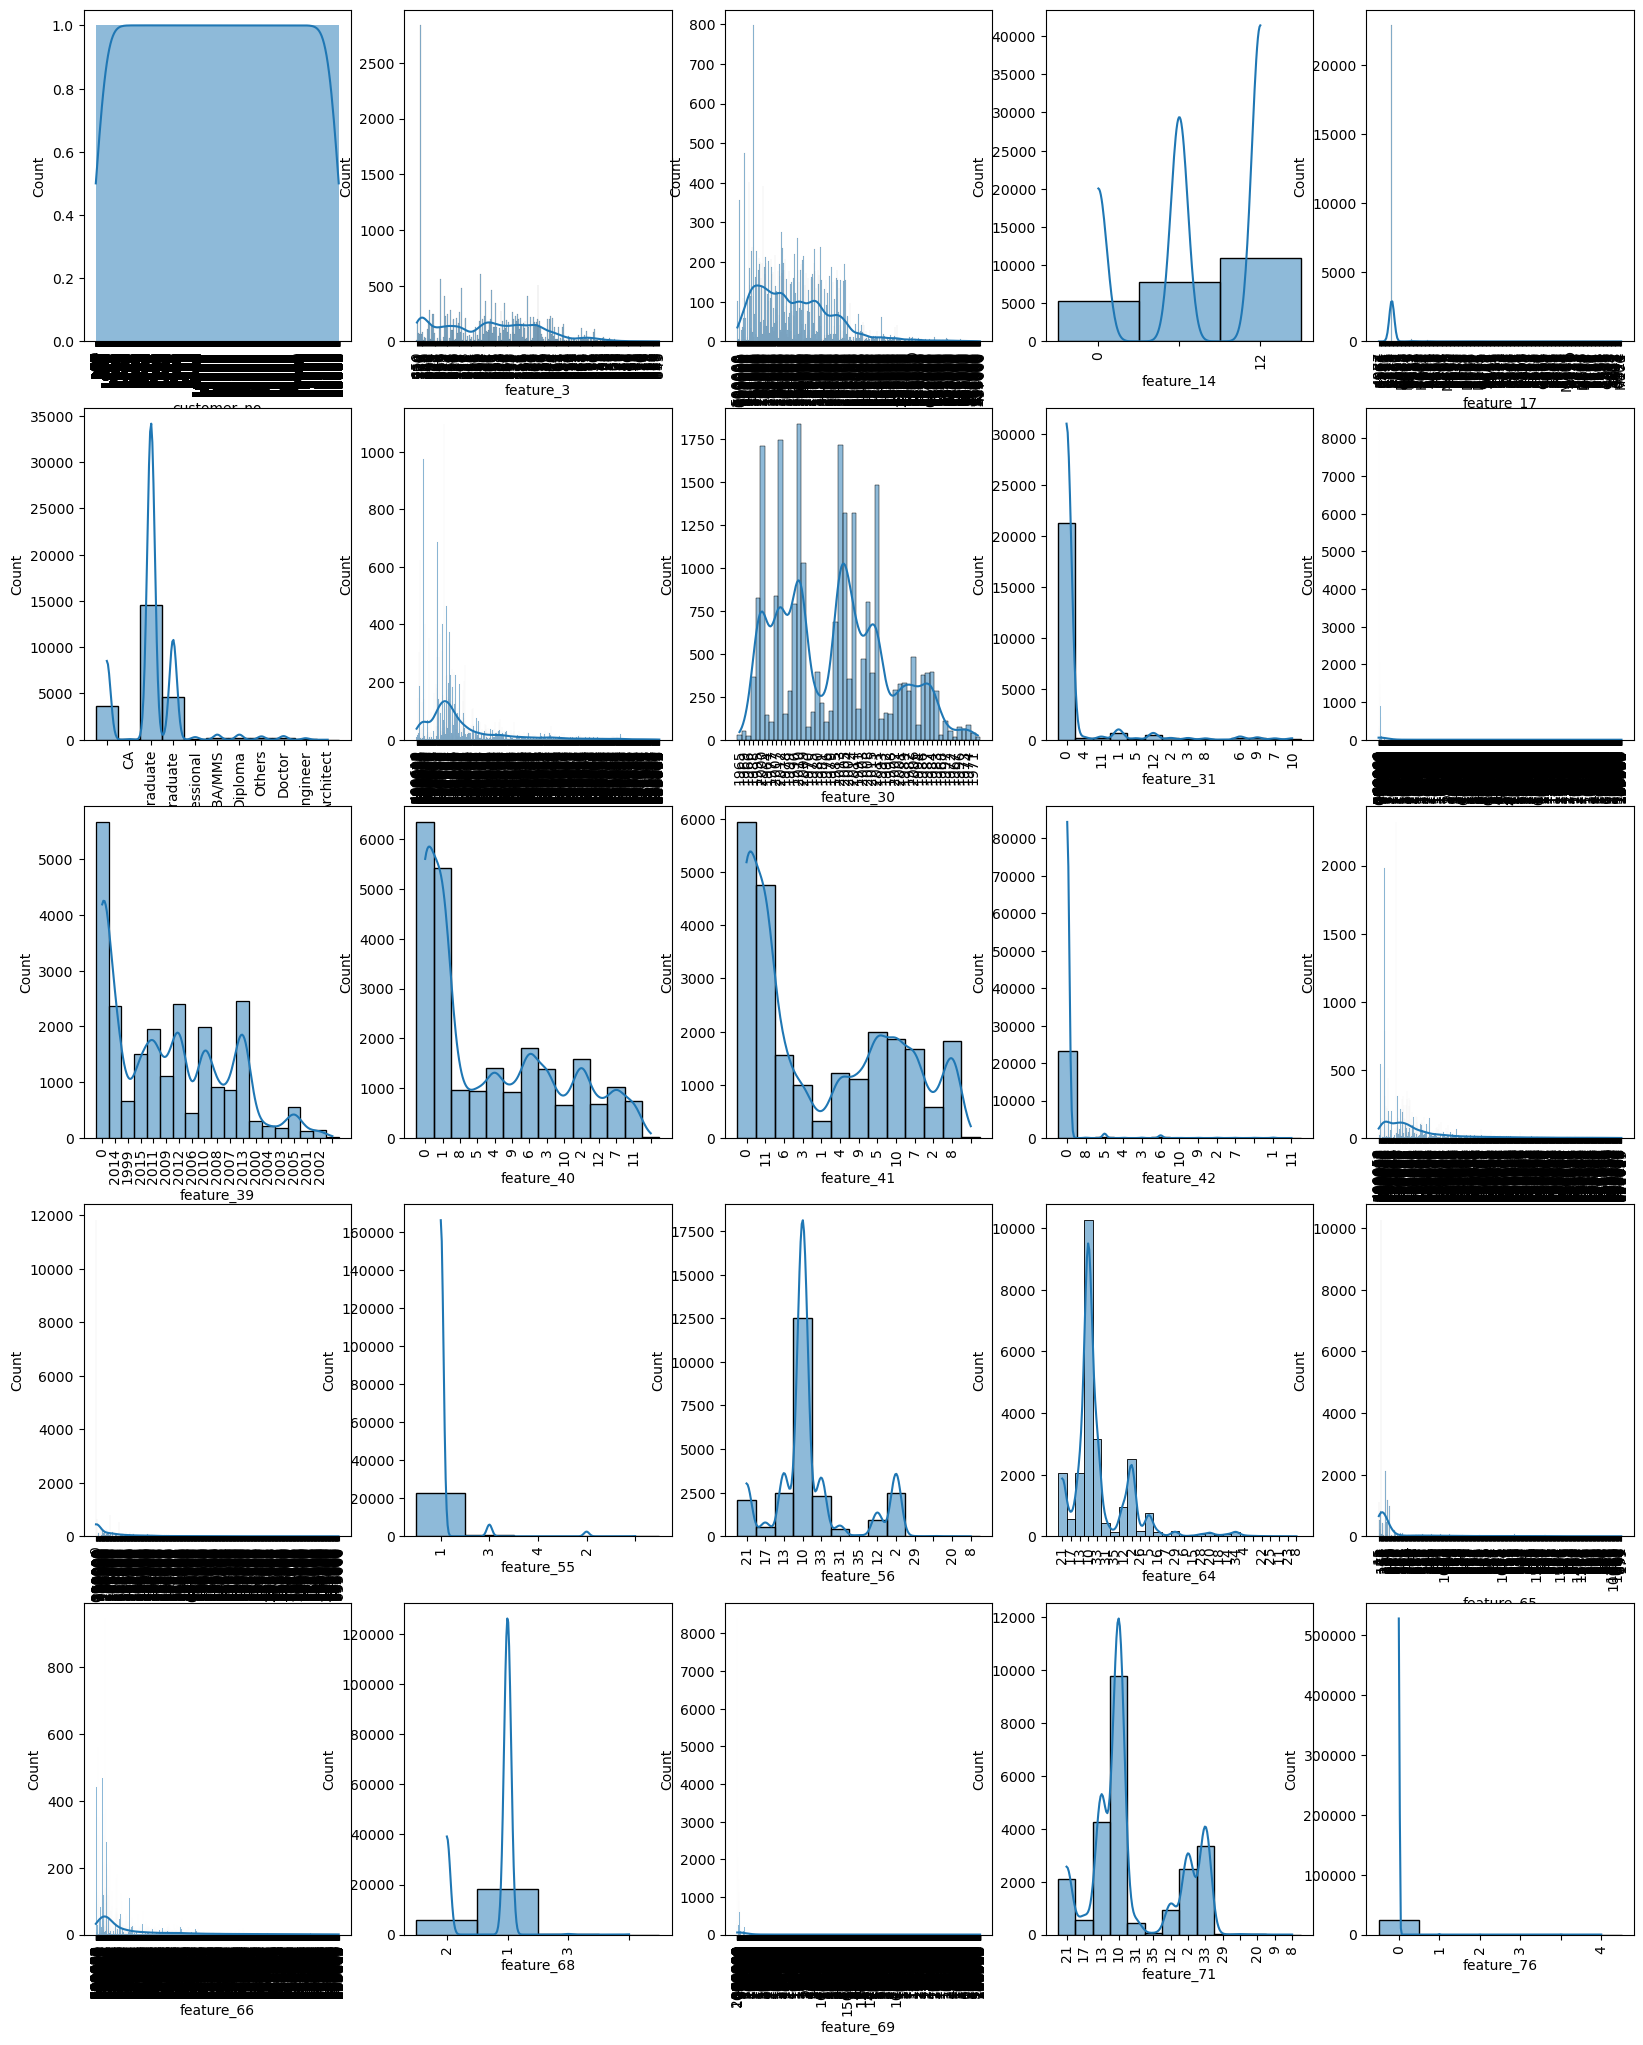

In [67]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in num_col:
    ax=plt.subplot(5,5,plotnumber)
    sns.histplot(x=num_col[column],kde=True)
    plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout
plt.show() 

<B>OBSERVATION
    
    - Many features are highly skewed, meaning transformations like log scaling or normalization might be needed.

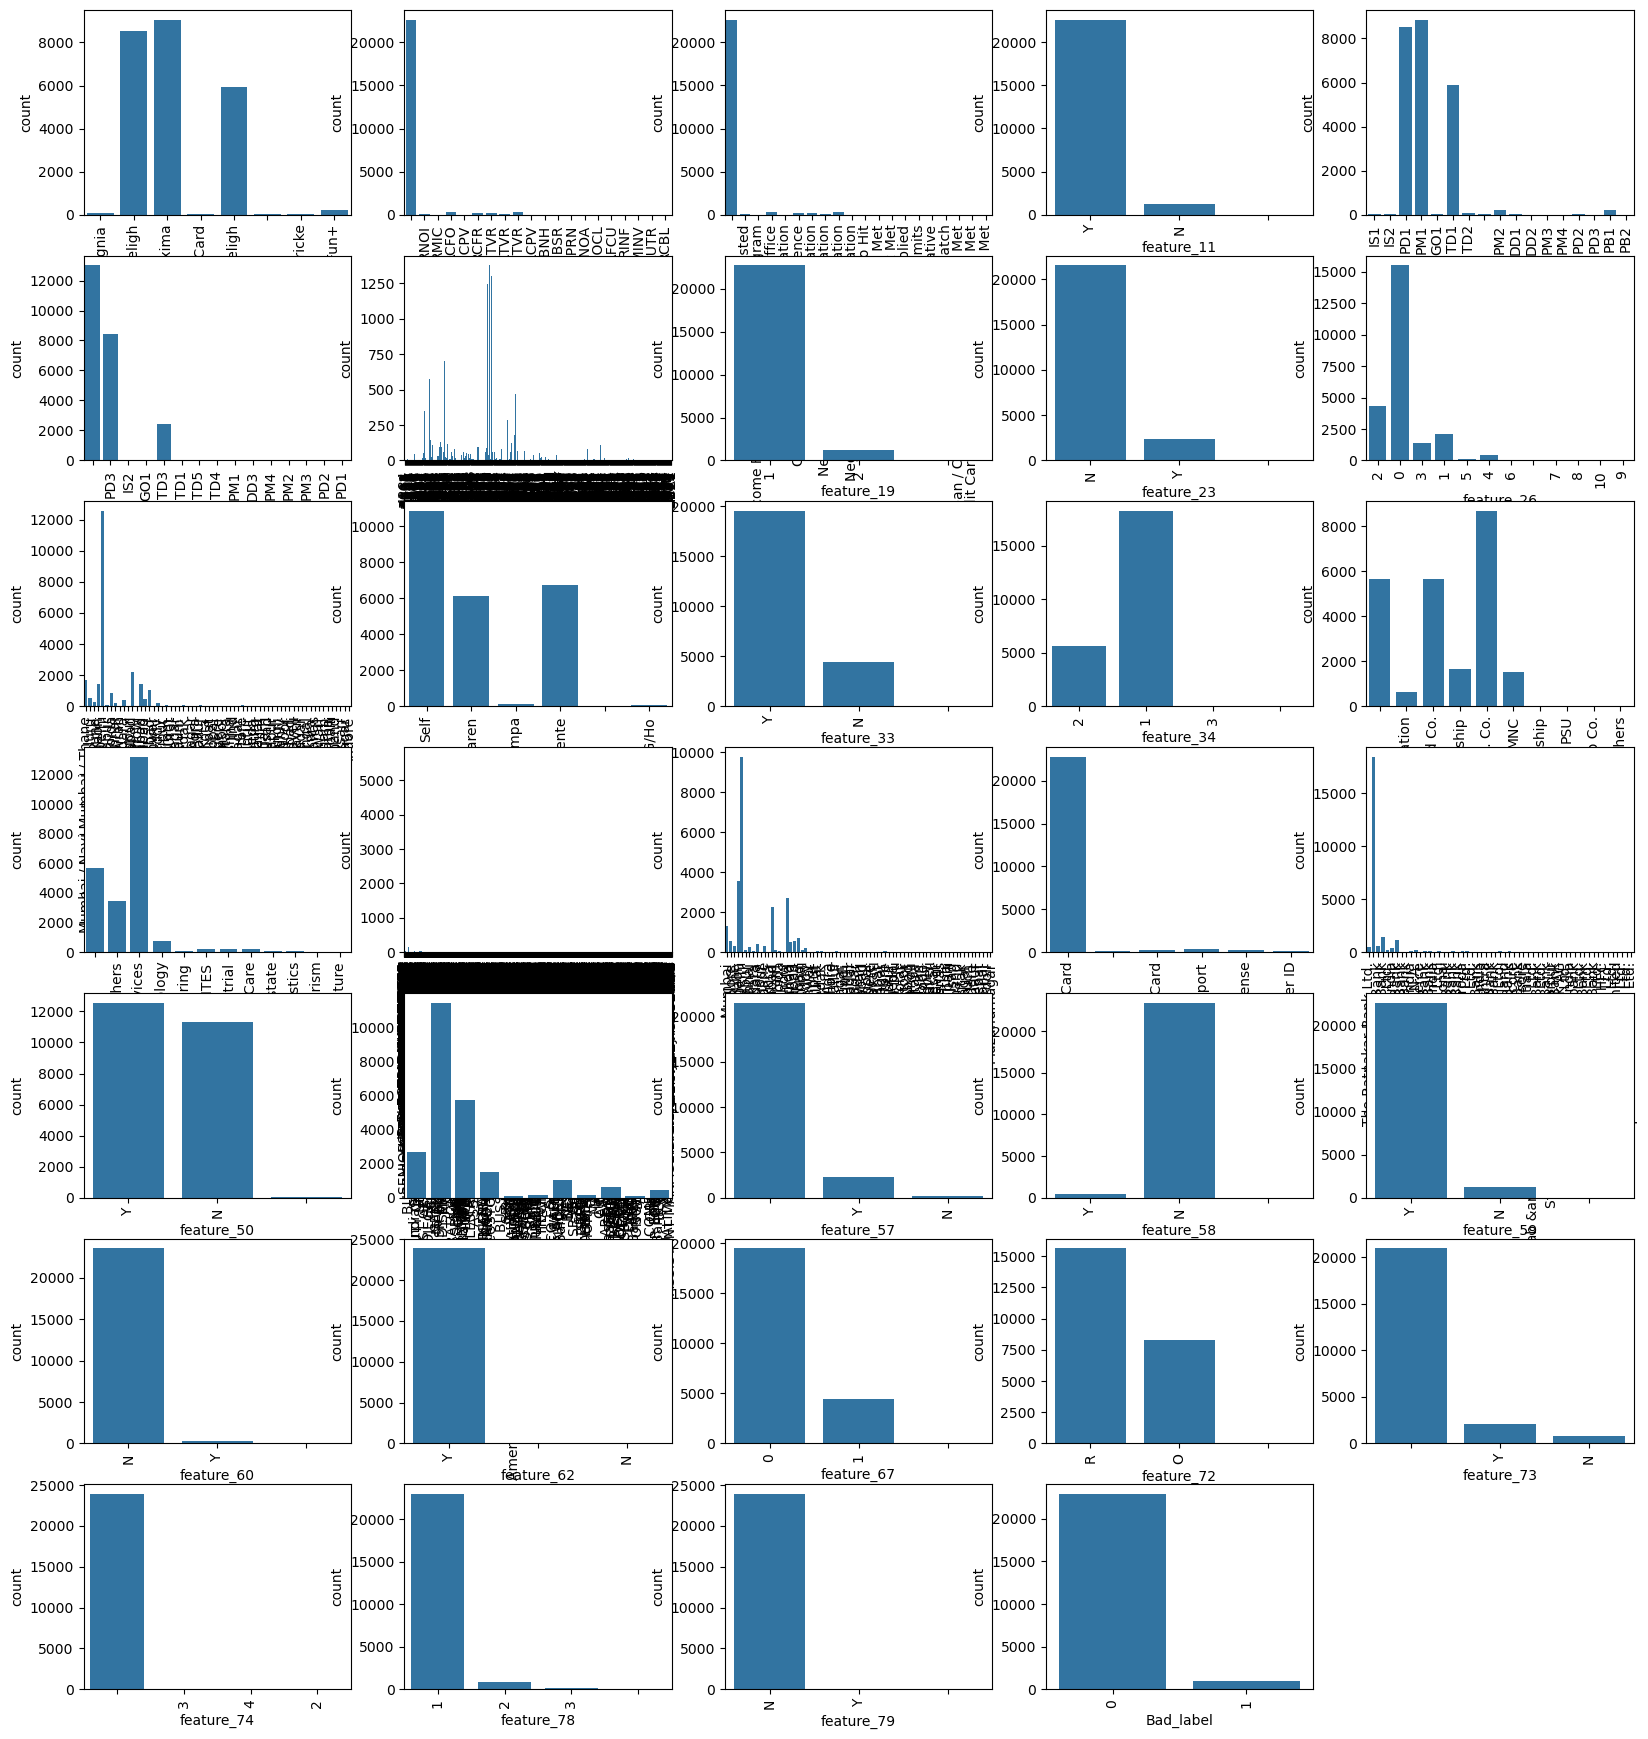

In [68]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in cat_col:
    ax=plt.subplot(8,5,plotnumber)
    sns.countplot(x=cat_col[column])
    plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout
plt.show()

<B>OBSERVATION

    - Feature_1: The most common value is Maxima.
    - Feature_11: Y appears more often than N.
    - Many customers are self-employed.
    - The Technology sector has the most customers.
    - PAN Card is the most used document for loan approval.
    - Feature_74, Feature_78, and Feature_79 mostly contain Y.
    - The Bad_Label column is mostly filled with 0.

In [69]:
Cust_Demographics_df.head(3)

dt_opened customer_no feature_1 feature_3 feature_7 feature_8 feature_9  \
0 2015-04-18           1  Insignia       650    500000                       
1 2015-04-21           2  Insignia       760   1200000                       
2 2015-04-22           3  Insignia       774    700000                       

  feature_11 feature_12 feature_13 feature_14 feature_16 feature_17  \
0          Y        IS1                     0       4284       4284   
1          Y        IS1                     0       B001       4077   
2          Y        IS1                     0       B001       4077   

  feature_19 feature_23 feature_25 feature_26 feature_27  \
0          1          N          1          2              
1          1          N          1          2              
2          2          N          1          0              

                     feature_28 feature_29 feature_30 feature_31 feature_32  \
0  Mumbai / Navi Mumbai / Thane     400610       1965          0       Self   
1                     Bengaluru     560042       1969          0       Self   
2                     Bengaluru     560042       1966          0       Self   

  feature_33 feature_34 feature_35 feature_36 feature_37 feature_38  \
0          Y          2      90000                                    
1          Y          2          1                                    
2          Y          2          1                                    

  feature_39 feature_40 feature_41 feature_42 feature_43 feature_44  \
0          0          0          0          0     Mumbai     400059   
1          0          0          0          0  Bangalore     560042   
2          0          0          0          0  Bangalore     560042   

  feature_46              feature_48 feature_50           feature_51  \
0   PAN Card  The Ratnakar Bank Ltd.          Y  State Bank of India   
1   PAN Card  The Ratnakar Bank Ltd.          N                        
2   PAN Card                                  N                        

  feature_52 feature_55 feature_56 feature_57 feature_58 feature_59  \
0          0          1         21                     Y          Y   
1          0          1         17                     Y          Y   
2          0          3         17                     N          Y   

  feature_60 feature_62 feature_64 feature_65 feature_66 feature_67  \
0          N          Y         21         15     400610          0   
1          N          Y         17         12     560042          0   
2          N          Y         17         12     560042          0   

  feature_68 feature_69 feature_71 feature_72 feature_73 feature_74  \
0          2      90000         21          R                         
1          2          1         17          R                         
2          2          1         17          R                         

  feature_76 feature_78 feature_79 Bad_label  
0          0          1          N         0  
1          0          1          N         0  
2          0          1          N         0

<B>CHECKING NULL VALUES

In [70]:
nan_rows = num_col[num_col.isna().any(axis=1)]
print("Rows with NaN values:", nan_rows)

Rows with NaN values: Empty DataFrame
Columns: [customer_no, feature_3, feature_7, feature_14, feature_17, feature_27, feature_29, feature_30, feature_31, feature_35, feature_39, feature_40, feature_41, feature_42, feature_44, feature_52, feature_55, feature_56, feature_64, feature_65, feature_66, feature_68, feature_69, feature_71, feature_76]
Index: []


In [71]:
nan_percentage_all_columns = (Cust_Demographics_df.isna().sum() / len(Cust_Demographics_df)) * 100
print("Percentage of NaN values in each column:")
print(nan_percentage_all_columns)

Percentage of NaN values in each column:
dt_opened      0.0
customer_no    0.0
feature_1      0.0
feature_3      0.0
feature_7      0.0
              ... 
feature_74     0.0
feature_76     0.0
feature_78     0.0
feature_79     0.0
Bad_label      0.0
Length: 61, dtype: float64


<b>OBSERVATION
    
    - Here there are very few amount of nan values present in each column. So, we will remove the NaN Values present in this Table

<B>FILLING NULL VALUES

In [72]:
Cust_Demographics_df.filled=Cust_Demographics_df.fillna(0)

### <B>ENCODING

<B>CONVERTING CATEGORICAL TO NUMERICAL 

In [73]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

In [74]:
# Iterate through each column in the DataFrame
for column in Cust_Demographics_df.columns:
    # Check if the column has object dtype (categorical)
    if Cust_Demographics_df[column].dtype == 'object':
        # Fit and transform the LabelEncoder for each categorical column
        Cust_Demographics_df[column] = lc.fit_transform(Cust_Demographics_df[column])

In [75]:
Cust_Demographics_df.head(4)

dt_opened  customer_no  feature_1  feature_3  feature_7  feature_8  \
0 2015-04-18            0          2         41        401          0   
1 2015-04-21        11111          2        151         29          0   
2 2015-04-22        16119          2        165        442          0   
3 2015-04-25        17230          2        161        401          0   

   feature_9  feature_11  feature_12  feature_13  feature_14  feature_16  \
0          0           2           4           0           1          42   
1          0           2           4           0           1         147   
2          0           2           4           0           1         147   
3          0           2           4           0           1          57   

   feature_17  feature_19  feature_23  feature_25  feature_26  feature_27  \
0         103           1           1           1           4           0   
1          93           1           1           1           4           0   
2          93           2           1           1           1           0   
3         154           1           1           1           5           0   

   feature_28  feature_29  feature_30  feature_31  feature_32  feature_33  \
0          40         410           2           1           5           2   
1          10         717           6           1           5           2   
2          10         717           3           1           5           2   
3          46         445          25           1           5           2   

   feature_34  feature_35  feature_36  feature_37  feature_38  feature_39  \
0           2        4236           0           0           0           1   
1           2           1           0           0           0           1   
2           2           1           0           0           0           1   
3           2           4           0           0           0           1   

   feature_40  feature_41  feature_42  feature_43  feature_44  feature_46  \
0           1           1           1          44         366           3   
1           1           1           1           7         729           3   
2           1           1           1           7         729           3   
3           1           1           1          52         474           3   

   feature_48  feature_50  feature_51  feature_52  feature_55  feature_56  \
0          51           2          10           1           1           7   
1          51           1           0           1           1           4   
2           0           1           0           1           3           4   
3          51           2           4           1           1           7   

   feature_57  feature_58  feature_59  feature_60  feature_62  feature_64  \
0           0           2           2           1           2          12   
1           0           2           2           1           2           8   
2           0           1           2           1           2           8   
3           0           2           2           1           2          12   

   feature_65  feature_66  feature_67  feature_68  feature_69  feature_71  \
0          49        1467           1           2        4236           7   
1          22        2005           1           2           1           4   
2          22        2005           1           2           1           4   
3          58        1504           1           2           4           7   

   feature_72  feature_73  feature_74  feature_76  feature_78  feature_79  \
0           2           0           0           1           1           1   
1           2           0           0           1           1           1   
2           2           0           0           1           1           1   
3           2           0           0           2           1           1   

   Bad_label  
0          0  
1          0  
2          0  
3          0

<b>OBSERVATION
    
    - All values in this table have been converted to numbers, and any missing (NaN) values have been filled.

In [76]:
Cust_Demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dt_opened    23896 non-null  datetime64[ns]
 1   customer_no  23896 non-null  int64         
 2   feature_1    23896 non-null  int64         
 3   feature_3    23896 non-null  int64         
 4   feature_7    23896 non-null  int64         
 5   feature_8    23896 non-null  int64         
 6   feature_9    23896 non-null  int64         
 7   feature_11   23896 non-null  int64         
 8   feature_12   23896 non-null  int64         
 9   feature_13   23896 non-null  int64         
 10  feature_14   23896 non-null  int64         
 11  feature_16   23896 non-null  int64         
 12  feature_17   23896 non-null  int64         
 13  feature_19   23896 non-null  int64         
 14  feature_23   23896 non-null  int64         
 15  feature_25   23896 non-null  int64         
 16  feat

<B>OBSERVATION

    - The "dt_opened" column records when a customer’s account was created. Since this detail is already in Table_1, we can remove it from Table_2 to avoid duplication.

    - The "customer_no" column uniquely identifies each customer and helps connect different tables.

    - The "feature_1" column represents various credit card types. The most popular are 'Platinum Maxima' (9,056 customers) and 'Platinum Delight' (8,541 customers).

    - The 'Titanium Delight' card is also widely used, with 5,943 customers.

    - Less common credit cards include 'RBL Fun' (218 customers), 'Insignia' (67 customers), 'Golf Card' (30 customers), and 'Platinum Cricket' (26 customers).

#### <B>NOW THE DATA IS CLEANED FULLY AND ALSO THE DATE TIME TYPE VALUES ARE ALSO CHANGED

### <B>ANALYZING THE CUSTOMER ENQUIRY DATASET

In [77]:
Cust_Enquiry_df

dt_opened customer_no  upload_dt enquiry_dt enq_purpose  enq_amt
0       18-Apr-15           1  21-Apr-15  19-Dec-14           2  3500000
1       18-Apr-15           1  21-Apr-15  05-Mar-14           5   500000
2       18-Apr-15           1  21-Apr-15  05-Mar-14           0    50000
3       18-Apr-15           1  21-Apr-15  22-Feb-14          10    50000
4       18-Apr-15           1  21-Apr-15  11-Jun-13          10     1000
...           ...         ...        ...        ...         ...      ...
413183  04-Dec-15       23896  09-Nov-15  22-Oct-11           5   200000
413184  04-Dec-15       23896  09-Nov-15  06-Jan-11          10    50000
413185  04-Dec-15       23896  09-Nov-15  01-Apr-10          10    50000
413186  04-Dec-15       23896  09-Nov-15  21-Feb-10           1   330000
413187  04-Dec-15       23896  09-Nov-15  17-Oct-07           2   682000

[413188 rows x 6 columns]

### <B>BASIC CHECKS

<B>CHECKING TOP 5 ROWS

In [78]:
Cust_Enquiry_df.head()

dt_opened customer_no  upload_dt enquiry_dt enq_purpose  enq_amt
0  18-Apr-15           1  21-Apr-15  19-Dec-14           2  3500000
1  18-Apr-15           1  21-Apr-15  05-Mar-14           5   500000
2  18-Apr-15           1  21-Apr-15  05-Mar-14           0    50000
3  18-Apr-15           1  21-Apr-15  22-Feb-14          10    50000
4  18-Apr-15           1  21-Apr-15  11-Jun-13          10     1000

<B>CHECKING BOTTOM 5 ROWS

In [79]:
Cust_Enquiry_df.tail()

dt_opened customer_no  upload_dt enquiry_dt enq_purpose enq_amt
413183  04-Dec-15       23896  09-Nov-15  22-Oct-11           5  200000
413184  04-Dec-15       23896  09-Nov-15  06-Jan-11          10   50000
413185  04-Dec-15       23896  09-Nov-15  01-Apr-10          10   50000
413186  04-Dec-15       23896  09-Nov-15  21-Feb-10           1  330000
413187  04-Dec-15       23896  09-Nov-15  17-Oct-07           2  682000

<B>CHECKING INFO

In [80]:
Cust_Enquiry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413188 entries, 0 to 413187
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   dt_opened    413188 non-null  object
 1   customer_no  413188 non-null  object
 2   upload_dt    413188 non-null  object
 3   enquiry_dt   413188 non-null  object
 4   enq_purpose  413188 non-null  object
 5   enq_amt      413188 non-null  object
dtypes: object(6)
memory usage: 18.9+ MB


<B>CHECKING STATISTICAL INFO

In [81]:
Cust_Enquiry_df.describe()

dt_opened customer_no  upload_dt enquiry_dt enq_purpose enq_amt
count      413188      413188     413188     413188      413188  413188
unique        197       23896         76       3772          37    7384
top     16-Nov-15       10076  21-Apr-15  17-Mar-15          10   50000
freq        10538         308      11770        495      238150   79949

### <B>EXPLORATORY DATA ANALYSIS FOR 'Cust_Enquiry' DATASET

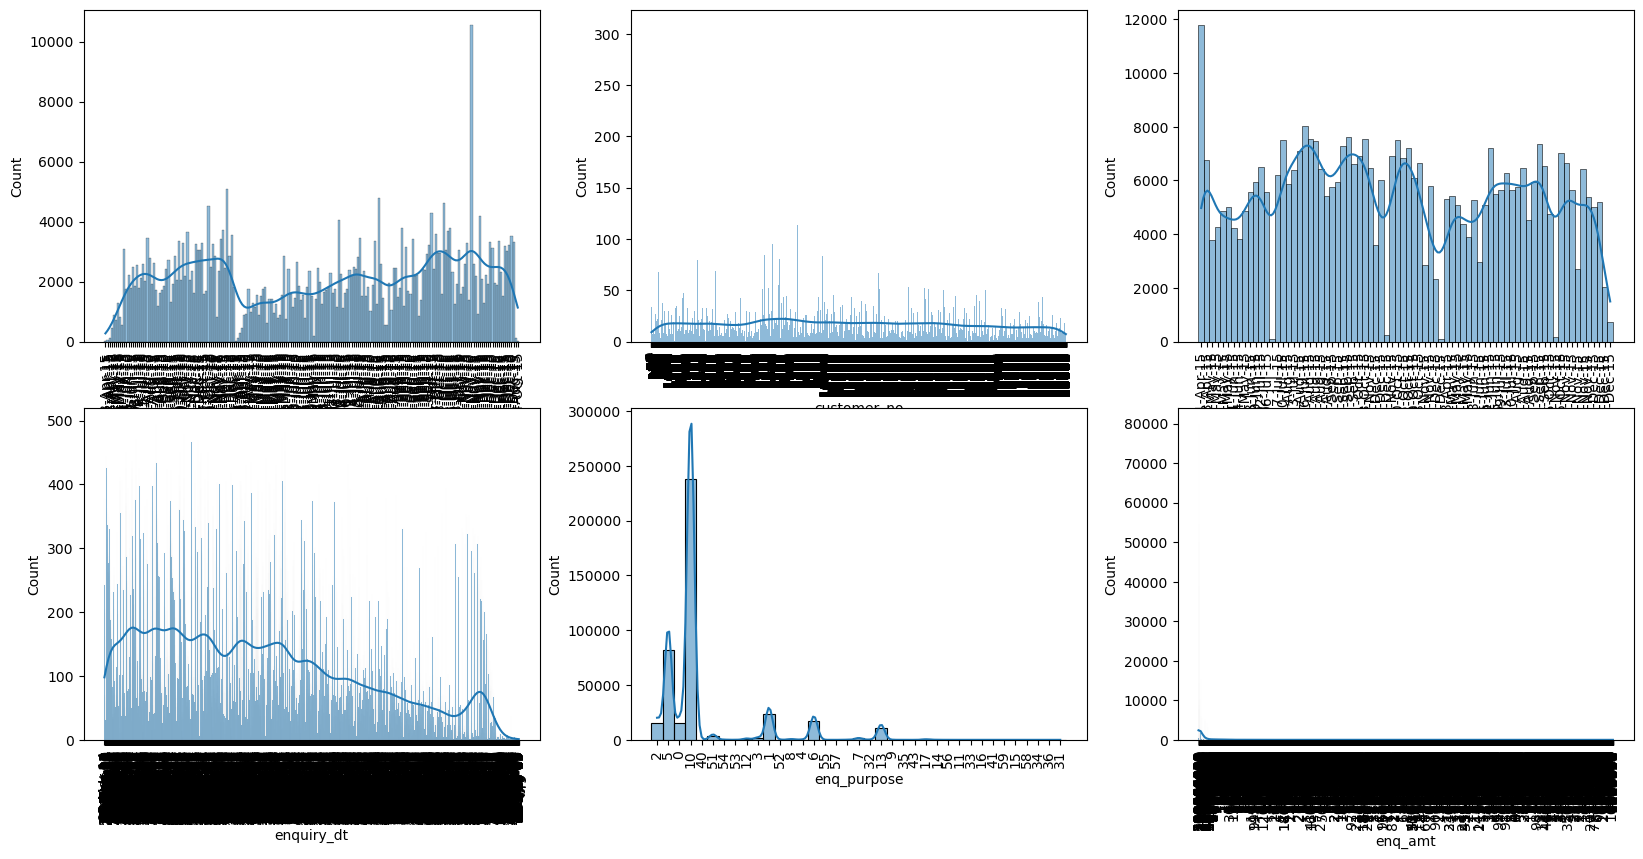

In [82]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in Cust_Enquiry_df:
    ax=plt.subplot(5,3,plotnumber)
    sns.histplot(x=Cust_Enquiry_df[column],kde=True)
    plt.xticks(rotation=90)
    plotnumber+=1
plt.tight_layout
plt.show()

### <B>INSIGHTS FROM THE GRAPH AND TABLE

<B>OBSERVATION

    - The "Cust_Enquiry" table has six columns: "dt_opened," "customer_no," "upload_dt," "enquiry_dt," "enq_purpose," and "enq_amt." This table records customer inquiries.

    - The columns "dt_opened" and "upload_dt" contain dates, which are not needed since "dt_opened" is already in other tables.

    - The remaining columns store customer inquiries, which are not useful for predicting the target class.

    - Since this table does not add value to the analysis, we can drop it.

### <B>DOMAIN ANALYSIS

    - Customer Account Data (Cust_Account): This table has a customer’s past account and payment history.

    - Customer Enquiry Data (Cust_Enquiry): This table records customer inquiries, including the amount and purpose.

    - Demographics Data (Cust_Demographics): This table has details of current customer applications and their demographics.

    - min_months_last_30_plus: The shortest time before a customer’s account had a 30+ days overdue payment.

    - mean_diff_open_enquiry_dt: The average time between when an account was opened and when an inquiry was made.

<B>OBSERVATION

    - Most people prefer to make payments twice.
    - In Feature 40, most people fall into category 0.
    - The most common value in "paymenthistory2" is a long string of zeros.
    - "Platinum Maxima" is the most popular choice in Feature 1, with 74,870 people selecting it.
    - In Feature 9, most people chose "Negative Office Tele Verification."
    - Most transactions are made by graduates.
    - New Delhi has the highest number of people.
    - Most people making transactions are self-employed.
    - The majority come from the Banking/Financial Services sector.

### <B>DATA ANALYSIS FOR ALL TABLES HAVE BEEN COMPLETED, SO NOW WE NEED TO MERGE THE REQUIRED TABLES TO FORM OUR FINAL TABLE.

In [83]:
# Merge tables using 'customer_no' as the common column

df_merged = cust_Account_df.merge(Cust_Demographics_df, on='customer_no', how='inner')

In [84]:
df_merged

dt_opened_x  customer_no  upload_dt  acct_type  opened_dt  \
0       2015-11-10        12265 2015-10-20          6 2013-06-09   
1       2015-11-10        12265 2015-10-20         10 2012-05-25   
2       2015-11-10        12265 2015-10-20         10 2012-03-22   
3       2015-07-20        15606 2015-07-09          6 2015-01-18   
4       2015-07-20        15606 2015-07-09          6 2015-01-14   
...            ...          ...        ...        ...        ...   
158755  2015-06-11         1611 2015-05-25          5 2008-04-29   
158756  2015-06-11         1611 2015-05-25          5 2007-10-08   
158757  2015-06-11         1611 2015-05-25         10 2007-05-30   
158758  2015-06-11         1611 2015-05-25         10 2007-05-02   
158759  2015-06-11         1611 2015-05-25         10 2007-04-11   

       last_paymt_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0         2014-06-30   2015-09-30          20900.0                0   
1         2015-09-06   2015-10-03          16201.0            10390   
2         2015-08-31   2015-09-30          41028.0            34420   
3         2015-05-05   2015-05-31          20250.0            13500   
4         2015-05-02   2015-05-31          20000.0             8000   
...              ...          ...              ...              ...   
158755    2011-07-30   2011-07-31         130000.0                0   
158756    2010-11-20   2010-11-30          75000.0                0   
158757    2012-09-05   2014-02-28          29516.0                0   
158758    2015-04-21   2015-04-30          24228.0            24228   
158759    2009-06-22   2015-04-30          19584.0                0   

       paymt_str_dt paymt_end_dt dt_opened_y  feature_1  feature_3  feature_7  \
0        2015-09-01   2014-07-01  2015-11-10          4          0        214   
1        2015-10-01   2012-11-01  2015-11-10          4          0        214   
2        2015-09-01   2012-10-01  2015-11-10          4          0        214   
3        2015-05-01   2015-01-01  2015-07-03          7        118         11   
4        2015-05-01   2015-01-01  2015-07-03          7        118         11   
...             ...          ...         ...        ...        ...        ...   
158755   2011-07-01   2008-08-01  2015-10-27          5        256        324   
158756   2010-11-01   2008-04-01  2015-10-27          5        256        324   
158757   2012-09-01   2009-10-01  2015-10-27          5        256        324   
158758   2015-04-01   2012-05-01  2015-10-27          5        256        324   
158759   2010-04-01   2009-08-01  2015-10-27          5        256        324   

        feature_8  feature_9  feature_11  feature_12  feature_13  feature_14  \
0               0          0           2           8           6           2   
1               0          0           2           8           6           2   
2               0          0           2           8           6           2   
3               0          0           2          15           0           1   
4               0          0           2          15           0           1   
...           ...        ...         ...         ...         ...         ...   
158755          0          0           2          11           0           1   
158756          0          0           2          11           0           1   
158757          0          0           2          11           0           1   
158758          0          0           2          11           0           1   
158759          0          0           2          11           0           1   

        feature_16  feature_17  feature_19  feature_23  feature_25  \
0              207           0           1           2           1   
1              207           0           1           2           1   
2              207           0           1           2           1   
3              288           0           1           1           1   
4              288           0           1           

In [85]:
df_merged.head(3)

dt_opened_x  customer_no  upload_dt  acct_type  opened_dt last_paymt_dt  \
0  2015-11-10        12265 2015-10-20          6 2013-06-09    2014-06-30   
1  2015-11-10        12265 2015-10-20         10 2012-05-25    2015-09-06   
2  2015-11-10        12265 2015-10-20         10 2012-03-22    2015-08-31   

  reporting_dt  high_credit_amt  cur_balance_amt paymt_str_dt paymt_end_dt  \
0   2015-09-30          20900.0                0   2015-09-01   2014-07-01   
1   2015-10-03          16201.0            10390   2015-10-01   2012-11-01   
2   2015-09-30          41028.0            34420   2015-09-01   2012-10-01   

  dt_opened_y  feature_1  feature_3  feature_7  feature_8  feature_9  \
0  2015-11-10          4          0        214          0          0   
1  2015-11-10          4          0        214          0          0   
2  2015-11-10          4          0        214          0          0   

   feature_11  feature_12  feature_13  feature_14  feature_16  feature_17  \
0           2           8           6           2         207           0   
1           2           8           6           2         207           0   
2           2           8           6           2         207           0   

   feature_19  feature_23  feature_25  feature_26  feature_27  feature_28  \
0           1           2           1           1           6          43   
1           1           2           1           1           6          43   
2           1           2           1           1           6          43   

   feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  \
0          79          21           1           5           2           2   
1          79          21           1           5           2           2   
2          79          21           1           5           2           2   

   feature_35  feature_36  feature_37  feature_38  feature_39  feature_40  \
0           1           0           0           0           1           1   
1           1           0           0           0           1           1   
2           1           0           0           0           1           1   

   feature_41  feature_42  feature_43  feature_44  feature_46  feature_48  \
0           1           1          48          80           3           0   
1           1           1          48          80           3           0   
2           1           1          48          80           3           0   

   feature_50  feature_51  feature_52  feature_55  feature_56  feature_57  \
0           1           0           1           1           1           0   
1           1           0           1           1           1           0   
2           1           0           1           1           1           0   

   feature_58  feature_59  feature_60  feature_62  feature_64  feature_65  \
0           1           2           1           2           1          55   
1           1           2           1           2           1          55   
2           1           2           1           2           1          55   

   feature_66  feature_67  feature_68  feature_69  feature_71  feature_72  \
0          79           1           2           1           1           2   
1          79           1           2           1           1           2   
2          79           1           2           1           1           2   

   feature_73  feature_74  feature_76  feature_78  feature_79  Bad_label  
0           0           0           1           1           1          1  
1           0           0           1           1           1          1  
2           0           0           1           1           1          1

In [86]:
df=df_merged.copy()

In [87]:
df

dt_opened_x  customer_no  upload_dt  acct_type  opened_dt  \
0       2015-11-10        12265 2015-10-20          6 2013-06-09   
1       2015-11-10        12265 2015-10-20         10 2012-05-25   
2       2015-11-10        12265 2015-10-20         10 2012-03-22   
3       2015-07-20        15606 2015-07-09          6 2015-01-18   
4       2015-07-20        15606 2015-07-09          6 2015-01-14   
...            ...          ...        ...        ...        ...   
158755  2015-06-11         1611 2015-05-25          5 2008-04-29   
158756  2015-06-11         1611 2015-05-25          5 2007-10-08   
158757  2015-06-11         1611 2015-05-25         10 2007-05-30   
158758  2015-06-11         1611 2015-05-25         10 2007-05-02   
158759  2015-06-11         1611 2015-05-25         10 2007-04-11   

       last_paymt_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0         2014-06-30   2015-09-30          20900.0                0   
1         2015-09-06   2015-10-03          16201.0            10390   
2         2015-08-31   2015-09-30          41028.0            34420   
3         2015-05-05   2015-05-31          20250.0            13500   
4         2015-05-02   2015-05-31          20000.0             8000   
...              ...          ...              ...              ...   
158755    2011-07-30   2011-07-31         130000.0                0   
158756    2010-11-20   2010-11-30          75000.0                0   
158757    2012-09-05   2014-02-28          29516.0                0   
158758    2015-04-21   2015-04-30          24228.0            24228   
158759    2009-06-22   2015-04-30          19584.0                0   

       paymt_str_dt paymt_end_dt dt_opened_y  feature_1  feature_3  feature_7  \
0        2015-09-01   2014-07-01  2015-11-10          4          0        214   
1        2015-10-01   2012-11-01  2015-11-10          4          0        214   
2        2015-09-01   2012-10-01  2015-11-10          4          0        214   
3        2015-05-01   2015-01-01  2015-07-03          7        118         11   
4        2015-05-01   2015-01-01  2015-07-03          7        118         11   
...             ...          ...         ...        ...        ...        ...   
158755   2011-07-01   2008-08-01  2015-10-27          5        256        324   
158756   2010-11-01   2008-04-01  2015-10-27          5        256        324   
158757   2012-09-01   2009-10-01  2015-10-27          5        256        324   
158758   2015-04-01   2012-05-01  2015-10-27          5        256        324   
158759   2010-04-01   2009-08-01  2015-10-27          5        256        324   

        feature_8  feature_9  feature_11  feature_12  feature_13  feature_14  \
0               0          0           2           8           6           2   
1               0          0           2           8           6           2   
2               0          0           2           8           6           2   
3               0          0           2          15           0           1   
4               0          0           2          15           0           1   
...           ...        ...         ...         ...         ...         ...   
158755          0          0           2          11           0           1   
158756          0          0           2          11           0           1   
158757          0          0           2          11           0           1   
158758          0          0           2          11           0           1   
158759          0          0           2          11           0           1   

        feature_16  feature_17  feature_19  feature_23  feature_25  \
0              207           0           1           2           1   
1              207           0           1           2           1   
2              207           0           1           2           1   
3              288           0           1           1           1   
4              288           0           1           

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158760 entries, 0 to 158759
Data columns (total 71 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   dt_opened_x      158760 non-null  datetime64[ns]
 1   customer_no      158760 non-null  int64         
 2   upload_dt        158760 non-null  datetime64[ns]
 3   acct_type        158760 non-null  int64         
 4   opened_dt        158760 non-null  datetime64[ns]
 5   last_paymt_dt    158760 non-null  datetime64[ns]
 6   reporting_dt     158760 non-null  datetime64[ns]
 7   high_credit_amt  158760 non-null  float64       
 8   cur_balance_amt  158760 non-null  int64         
 9   paymt_str_dt     158760 non-null  datetime64[ns]
 10  paymt_end_dt     158760 non-null  datetime64[ns]
 11  dt_opened_y      158760 non-null  datetime64[ns]
 12  feature_1        158760 non-null  int64         
 13  feature_3        158760 non-null  int64         
 14  feature_7        158

<b>CHECKING FOR DUPLICATES IN FINAL TABLE

In [89]:
df.duplicated().sum()

np.int64(124)

In [90]:
df.drop_duplicates(inplace=True)

<B>DISTRIBUTION OF NUMERIC COLUMN

     - We plot histograms to see how numerical columns are distributed.

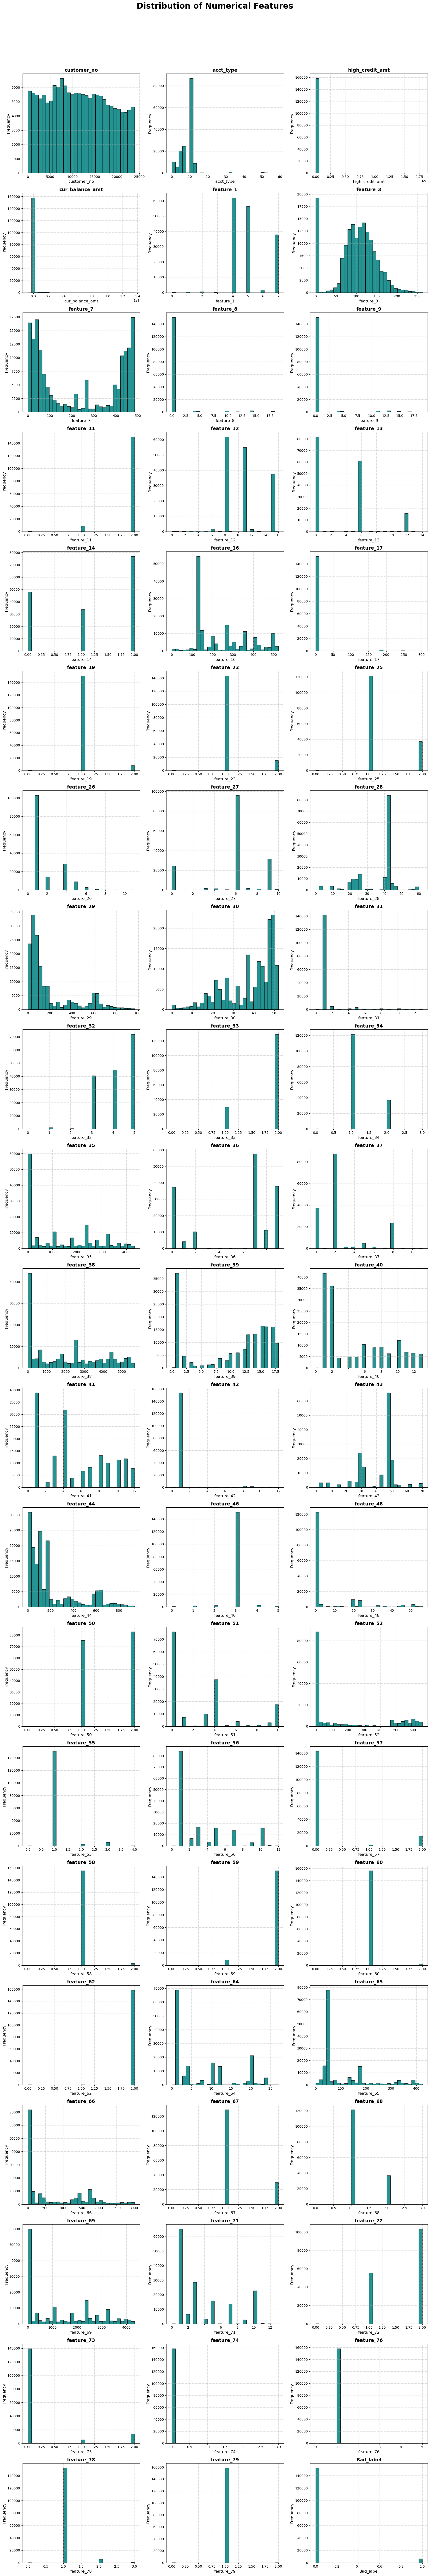

In [91]:
num_columns = df.select_dtypes(include='number').columns
num_features = len(num_columns)

cols_per_row = 3
rows = (num_features // cols_per_row) + int(num_features % cols_per_row != 0)
plt.figure(figsize=(cols_per_row * 6, rows * 5))  # Dynamically scale the figure

for i, column in enumerate(num_columns, 1):
    plt.subplot(rows, cols_per_row, i)
    plt.hist(df[column].dropna(), bins=30, color='teal', edgecolor='black', alpha=0.85)
    plt.title(f'{column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.suptitle('Distribution of Numerical Features', fontsize=24, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

<B>INSIGHT


    - dt_opened_x, upload_dt, opened_dt, last_paymt_dt, reporting_dt, paymt_str_dt, paymt_end_dt, dt_opened_y These columns show skewed distributions, meaning most values are concentrated in specific periods.
    
    - Some date fields start from very old dates

    - customer_no : 
        - A uniform distribution, meaning all customers are well-represented.
        - Some columns have extreme outliers, while others have categorical characteristics that need encoding. The target variable (Bad_label) is highly imbalanced, which may impact model performance. Date columns need proper formatting, and some features show bimodal distributions, indicating different customer segments.
    
    - In this dataset checking and handling outliers might not be important
    
    - The outliers represent valid data points (e.g., high salaries for senior staff or low salaries for part-time employees), and removing them would lead to a loss of valuable information
    - so we are not handing Outliers

    - Many features are highly skewed (right or left skewed).
    - Some features have large value ranges, while others have small discrete values.
    - Some features look normally distributed, but many have peaks at one side, indicating skewness.

<B>CHECK THE COLIUMNS HAVING UNIQUE VALUES

In [92]:
# Using loop to find those columns which have more than 80% unique value.

max_unique = []
for i in df.iloc[:,:-2].columns :
    if df[i].value_counts().max() / len(df) * 100 >= 80 :
        max_unique.append(i)

In [93]:
# To see those columns name which has more than 80% unique value.

print(max_unique,end=' ')

['feature_8', 'feature_9', 'feature_11', 'feature_17', 'feature_19', 'feature_23', 'feature_31', 'feature_33', 'feature_42', 'feature_46', 'feature_55', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_62', 'feature_67', 'feature_73', 'feature_74', 'feature_76', 'feature_78'] 

<B>DROPING UNIQUE COLUMNS

In [94]:
ununique_columns=df[['feature_8', 'feature_9', 'feature_11', 'feature_17', 'feature_19', 'feature_23', 'feature_31', 'feature_33', 'feature_42', 'feature_46', 'feature_55', 'feature_57', 'feature_58', 'feature_59', 'feature_60', 'feature_62', 'feature_67', 'feature_73', 'feature_74', 'feature_76', 'feature_78']]

In [95]:
df.drop(columns=ununique_columns,axis=1,inplace=True)

<B>OBSERVATION
    
    - Here we have dropped the columns which has unique values more than 80 % 

In [96]:
df.columns

Index(['dt_opened_x', 'customer_no', 'upload_dt', 'acct_type', 'opened_dt',
       'last_paymt_dt', 'reporting_dt', 'high_credit_amt', 'cur_balance_amt',
       'paymt_str_dt', 'paymt_end_dt', 'dt_opened_y', 'feature_1', 'feature_3',
       'feature_7', 'feature_12', 'feature_13', 'feature_14', 'feature_16',
       'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29',
       'feature_30', 'feature_32', 'feature_34', 'feature_35', 'feature_36',
       'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41',
       'feature_43', 'feature_44', 'feature_48', 'feature_50', 'feature_51',
       'feature_52', 'feature_56', 'feature_64', 'feature_65', 'feature_66',
       'feature_68', 'feature_69', 'feature_71', 'feature_72', 'feature_79',
       'Bad_label'],
      dtype='object')

In [97]:
# Select only numerical columns for correlation, excluding the target column
Corr_data = df.select_dtypes(include=['number']).drop(columns=['Bad_label'], errors='ignore')

In [98]:
# Display the first few rows to verify
Corr_data.head()

customer_no  acct_type  high_credit_amt  cur_balance_amt  feature_1  \
0        12265          6          20900.0                0          4   
1        12265         10          16201.0            10390          4   
2        12265         10          41028.0            34420          4   
3        15606          6          20250.0            13500          7   
4        15606          6          20000.0             8000          7   

   feature_3  feature_7  feature_12  feature_13  feature_14  feature_16  \
0          0        214           8           6           2         207   
1          0        214           8           6           2         207   
2          0        214           8           6           2         207   
3        118         11          15           0           1         288   
4        118         11          15           0           1         288   

   feature_25  feature_26  feature_27  feature_28  feature_29  feature_30  \
0           1           1           6          43          79          21   
1           1           1           6          43          79          21   
2           1           1           6          43          79          21   
3           1           4           0          26         568          49   
4           1           4           0          26         568          49   

   feature_32  feature_34  feature_35  feature_36  feature_37  feature_38  \
0           5           2           1           0           0           0   
1           5           2           1           0           0           0   
2           5           2           1           0           0           0   
3           3           1        2572           7           2        4144   
4           3           1        2572           7           2        4144   

   feature_39  feature_40  feature_41  feature_43  feature_44  feature_48  \
0           1           1           1          48          80           0   
1           1           1           1          48          80           0   
2           1           1           1          48          80           0   
3          12           9           4          32         588           0   
4          12           9           4          32         588           0   

   feature_50  feature_51  feature_52  feature_56  feature_64  feature_65  \
0           1           0           1           1           1          55   
1           1           0           1           1           1          55   
2           1           0           1           1           1          55   
3           2           9         476           5          10          40   
4           2           9         476           5          10          40   

   feature_66  feature_68  feature_69  feature_71  feature_72  feature_79  
0          79           2           1           1           2           1  
1          79           2           1           1           2           1  
2          79           2           1           1           2           1  
3        1745           1        2572           5           2           1  
4        1745           1        2572           5           2           1

### <B>CHECK FOR CO-RELATIONS

In [99]:
Corr_data.corr()

customer_no  acct_type  high_credit_amt  cur_balance_amt  \
customer_no         1.000000   0.009576        -0.011117    -3.692953e-03   
acct_type           0.009576   1.000000        -0.081683    -8.744796e-02   
high_credit_amt    -0.011117  -0.081683         1.000000     7.680922e-01   
cur_balance_amt    -0.003693  -0.087448         0.768092     1.000000e+00   
feature_1           0.272612   0.007225        -0.004339    -2.713834e-03   
feature_3           0.009937  -0.003336         0.000876     1.706383e-03   
feature_7           0.006262   0.003639        -0.000480    -4.261209e-04   
feature_12          0.240089   0.007807        -0.003607    -2.362768e-03   
feature_13         -0.057592  -0.007609         0.004254     4.118211e-03   
feature_14          0.000702  -0.010079         0.009271     7.513994e-03   
feature_16          0.005101   0.003313        -0.001844    -1.785446e-03   
feature_25          0.008580  -0.002712        -0.001777    -2.920115e-03   
feature_26          0.100502   0.003754         0.005217     1.759402e-03   
feature_27         -0.036273   0.001289        -0.006692    -4.482781e-03   
feature_28         -0.034053  -0.003474         0.006430     6.394553e-03   
feature_29          0.085103   0.003262        -0.002575    -1.717278e-03   
feature_30          0.022560   0.000856         0.004867     1.975684e-03   
feature_32          0.050285   0.000795         0.007037     3.887292e-03   
feature_34         -0.032732  -0.000747         0.000457    -9.273926e-05   
feature_35          0.030650   0.002972         0.001816     5.945640e-04   
feature_36          0.022597  -0.000564         0.001886     6.452582e-04   
feature_37         -0.044103  -0.000328        -0.004235    -2.584427e-03   
feature_38          0.035204  -0.000650        -0.000901    -1.525629e-03   
feature_39          0.029442   0.001863         0.000437    -6.369306e-04   
feature_40          0.040081   0.002107         0.007404     4.838980e-03   
feature_41          0.026530  -0.000613        -0.000140    -5.091187e-04   
feature_43         -0.030168  -0.004609         0.008400     6.215862e-03   
feature_44          0.089968   0.003372        -0.003372    -2.516939e-03   
feature_48          0.022554  -0.001336         0.001594     2.452159e-03   
feature_50          0.041650   0.000594         0.002768    -7.672364e-07   
feature_51          0.035035  -0.001592         0.002350    -9.524322e-04   
feature_52          0.019417   0.002770         0.003026     1.226795e-03   
feature_56          0.035405  -0.000325        -0.001813    -3.276082e-03   
feature_64          0.020833  -0.000745        -0.003393    -3.223954e-03   
feature_65         -0.033158  -0.001503         0.000407     6.347402e-04   
feature_66          0.045061   0.000271        -0.005376    -3.917423e-03   
feature_68         -0.032732  -0.000747         0.000457    -9.273926e-05   
feature_69          0.030650   0.002972         0.001816     5.945640e-04   
feature_71          0.034516   0.000652        -0.001326    -1.688271e-03   
feature_72          0.010759   0.003938        -0.008448    -3.023680e-03   
feature_79          0.005194   0.001755         0.000766     6.998770e-04   

                 feature_1  feature_3  feature_7  feature_12  feature_13  \
customer_no       0.272612   0.009937   0.006262    0.240089   -0.057592   
acct_type         0.007225  -0.003336   0.003639    0.007807   -0.007609   
high_credit_amt  -0.004339   0.000876  -0.000480   -0.003607    0.004254   
cur_balance_amt  -0.002714   0.001706  -0.000426   -0.002363    0.004118   
feature_1         1.000000   0.019135  -0.002276    0.960389   -0.041940   
feature_3         0.019135   1.000000  -0.330186    0.013822    0.037056   
feature_7        -0.002276  -0.330186   1.000000    0.004107   -0.024866   
feature_12        0.960389   0.013822   0.004107    1.000000   -0.098724   
feature_13       -0.041940   0.037056  -0.024866   -0.098724    1.000000   
feature_14       -0.18

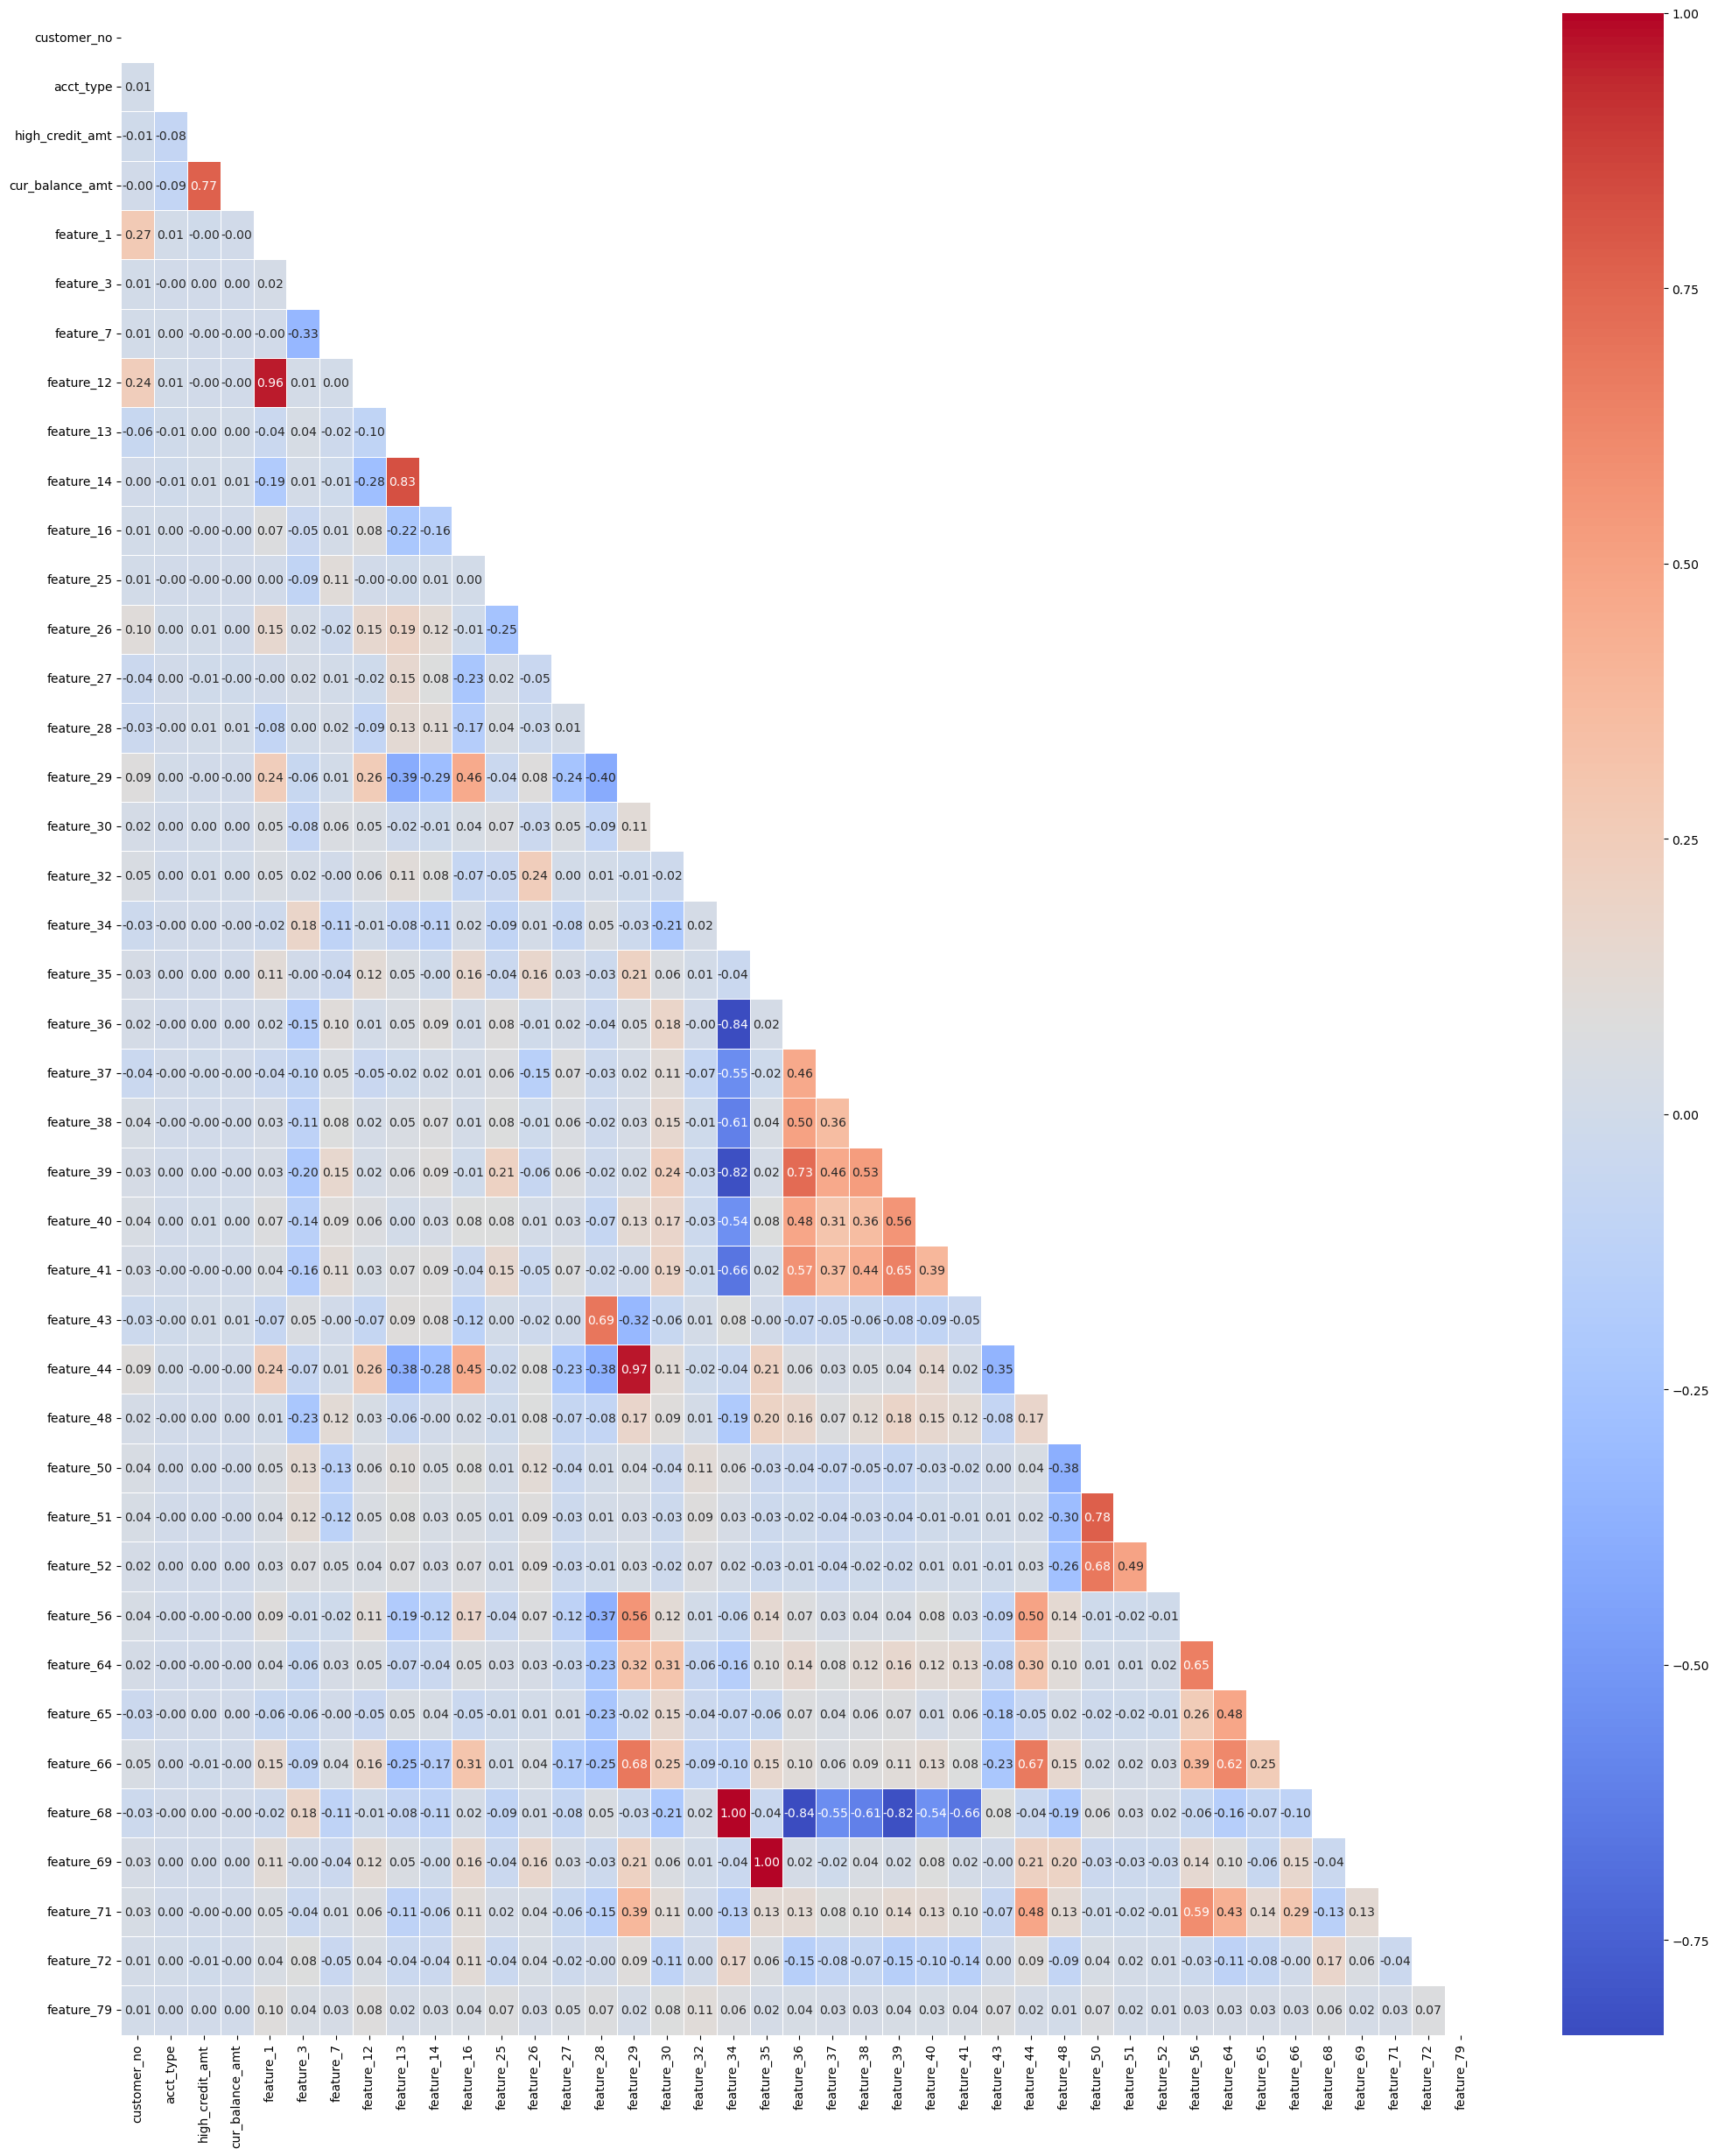

In [100]:
correlation_matrix = Corr_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(25, 30))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, mask=mask)
plt.show()

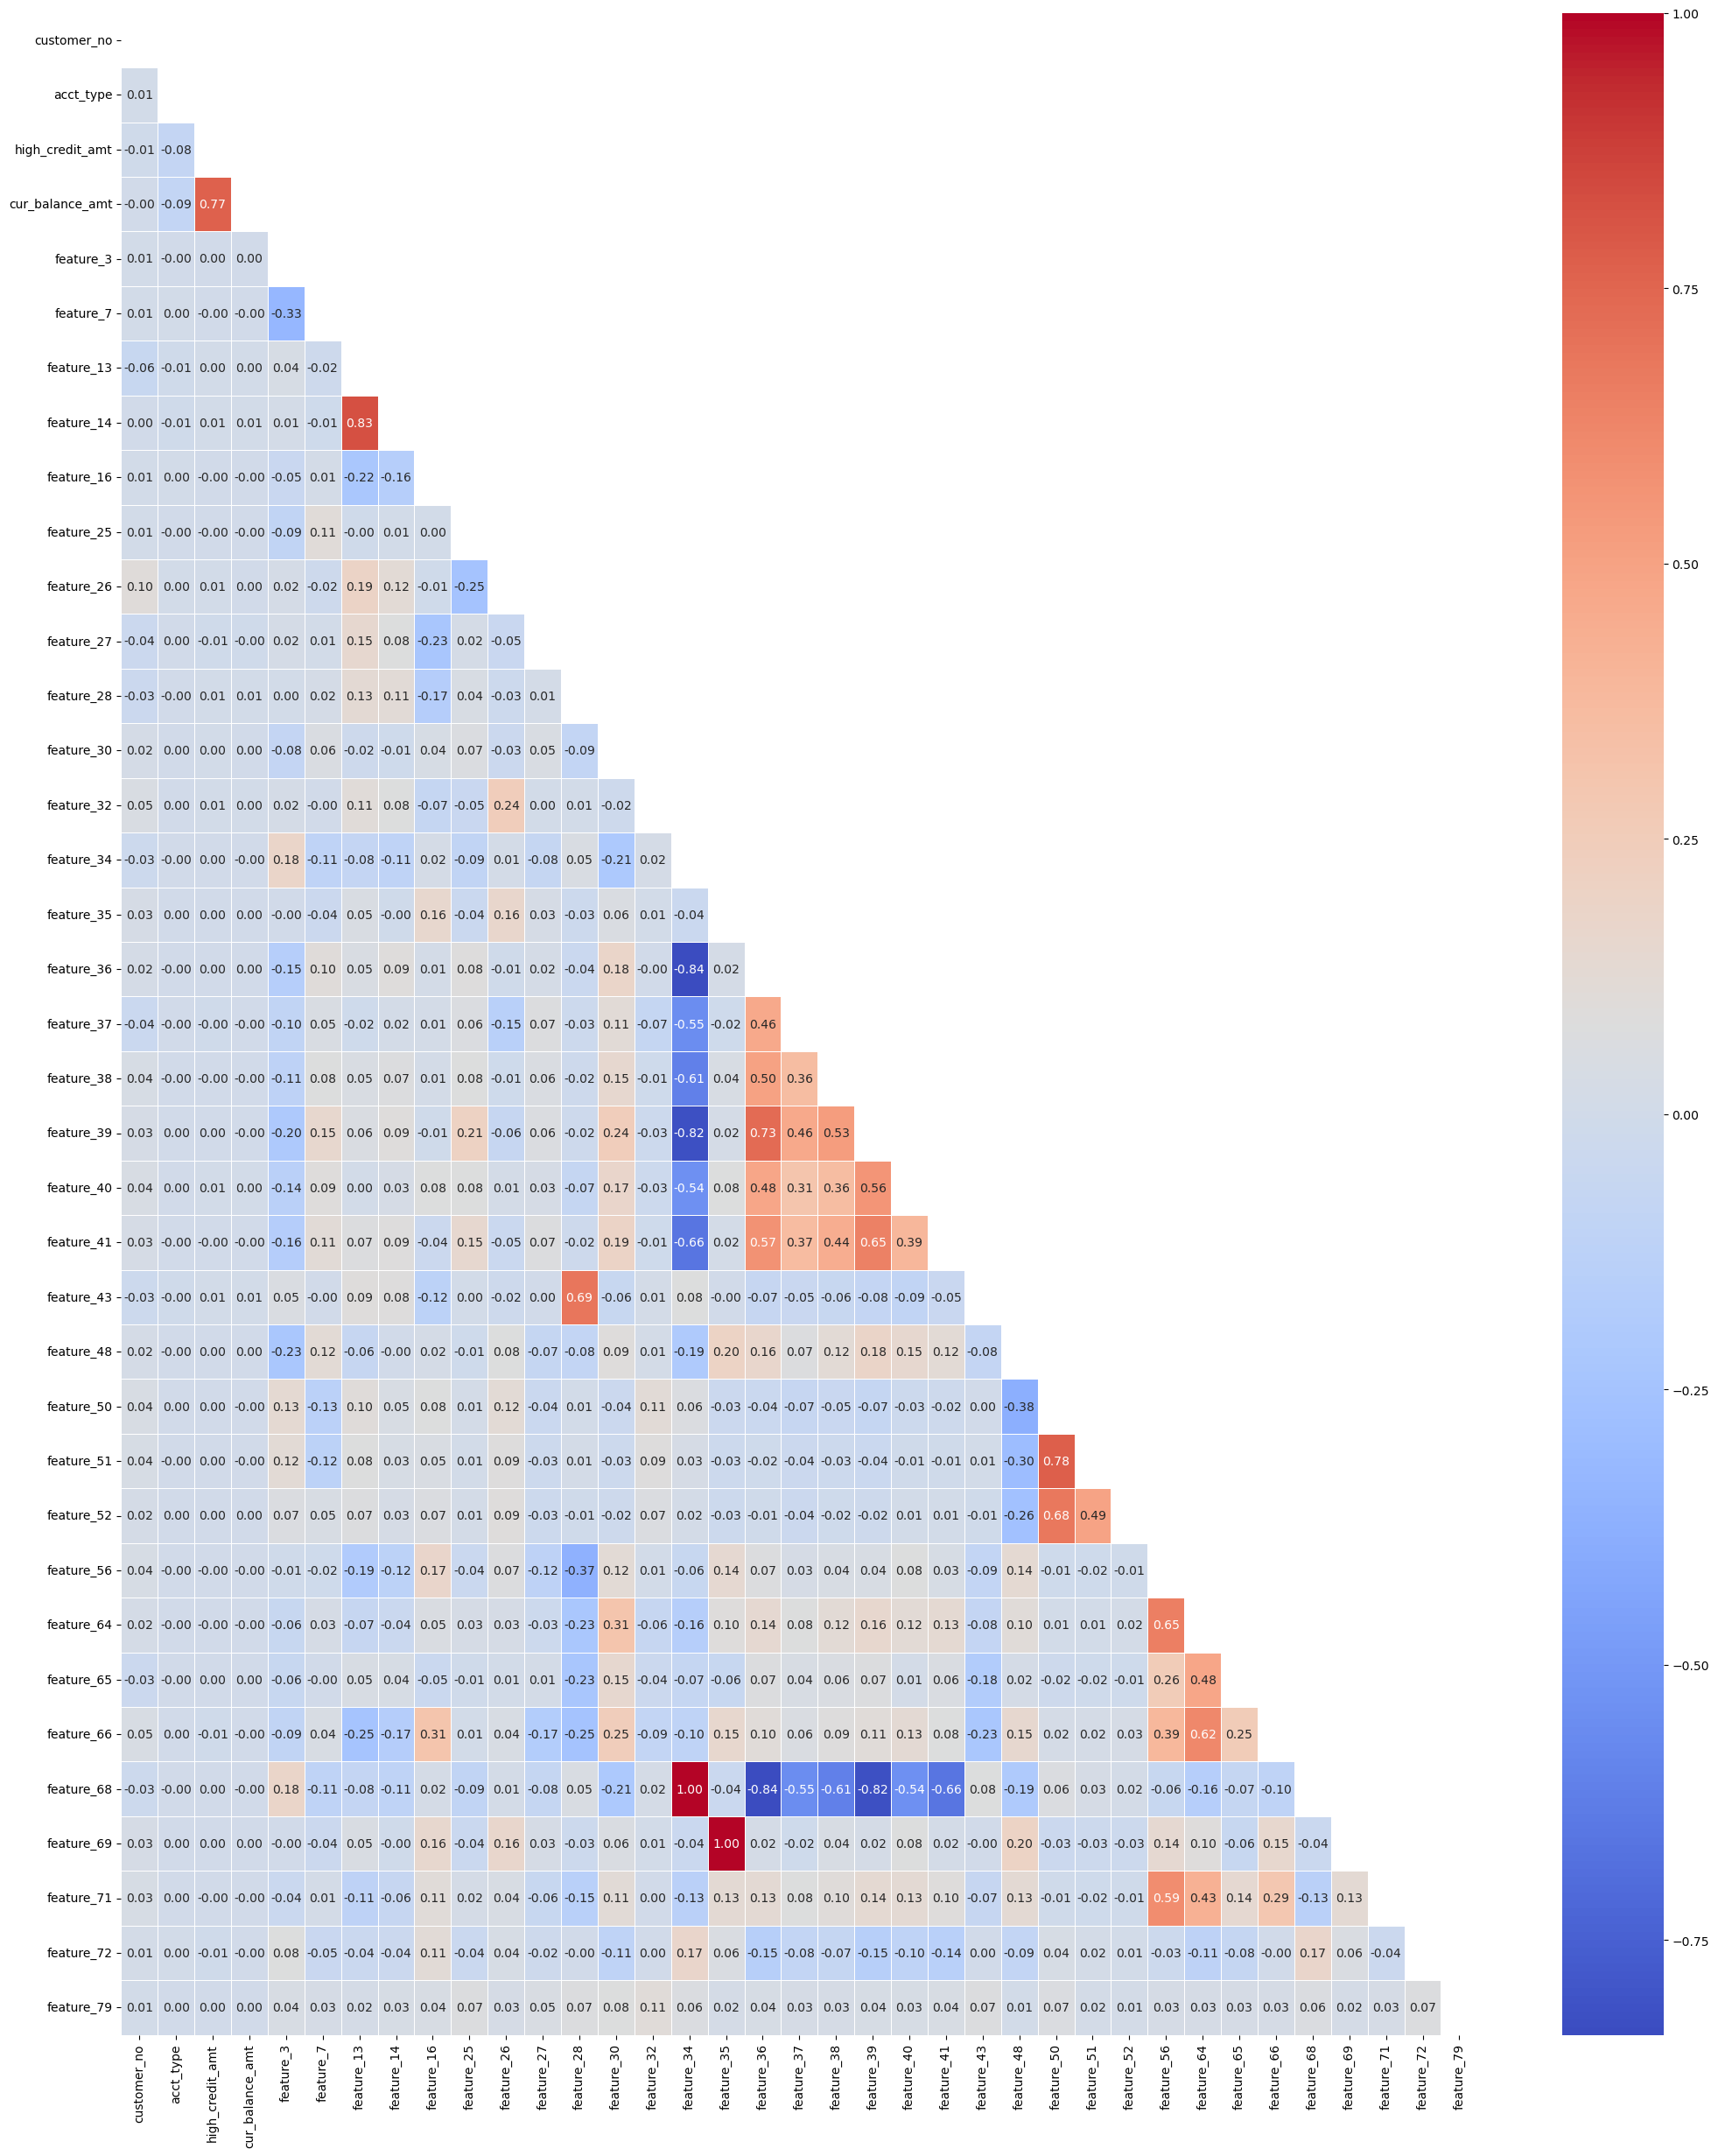

Removed columns due to high correlation: ['feature_1', 'feature_12', 'feature_29', 'feature_44']


In [101]:
# Create a mask for self-correlation (diagonal) and values above 0.90
high_corr = (correlation_matrix.abs() > 0.90) & (correlation_matrix != 1.0)

# Identify columns to drop (if any correlation is above 0.90)
cols_to_drop = high_corr.any(axis=0)
filtered_data = Corr_data.loc[:, ~cols_to_drop]

# Recalculate the correlation matrix after dropping columns
filtered_correlation_matrix = filtered_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(filtered_correlation_matrix, dtype=bool))
plt.figure(figsize=(25, 30))
sns.heatmap(filtered_correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, mask=mask)
plt.show()
print("Removed columns due to high correlation:", Corr_data.columns[cols_to_drop].tolist())

<B>OBSERVATION
    
    - We Removed columns due to high correlation ['feature_1', 'feature_12', 'feature_29', 'feature_44']

## <B>MODEL TRAINING

In [102]:
df

dt_opened_x  customer_no  upload_dt  acct_type  opened_dt  \
0       2015-11-10        12265 2015-10-20          6 2013-06-09   
1       2015-11-10        12265 2015-10-20         10 2012-05-25   
2       2015-11-10        12265 2015-10-20         10 2012-03-22   
3       2015-07-20        15606 2015-07-09          6 2015-01-18   
4       2015-07-20        15606 2015-07-09          6 2015-01-14   
...            ...          ...        ...        ...        ...   
158755  2015-06-11         1611 2015-05-25          5 2008-04-29   
158756  2015-06-11         1611 2015-05-25          5 2007-10-08   
158757  2015-06-11         1611 2015-05-25         10 2007-05-30   
158758  2015-06-11         1611 2015-05-25         10 2007-05-02   
158759  2015-06-11         1611 2015-05-25         10 2007-04-11   

       last_paymt_dt reporting_dt  high_credit_amt  cur_balance_amt  \
0         2014-06-30   2015-09-30          20900.0                0   
1         2015-09-06   2015-10-03          16201.0            10390   
2         2015-08-31   2015-09-30          41028.0            34420   
3         2015-05-05   2015-05-31          20250.0            13500   
4         2015-05-02   2015-05-31          20000.0             8000   
...              ...          ...              ...              ...   
158755    2011-07-30   2011-07-31         130000.0                0   
158756    2010-11-20   2010-11-30          75000.0                0   
158757    2012-09-05   2014-02-28          29516.0                0   
158758    2015-04-21   2015-04-30          24228.0            24228   
158759    2009-06-22   2015-04-30          19584.0                0   

       paymt_str_dt paymt_end_dt dt_opened_y  feature_1  feature_3  feature_7  \
0        2015-09-01   2014-07-01  2015-11-10          4          0        214   
1        2015-10-01   2012-11-01  2015-11-10          4          0        214   
2        2015-09-01   2012-10-01  2015-11-10          4          0        214   
3        2015-05-01   2015-01-01  2015-07-03          7        118         11   
4        2015-05-01   2015-01-01  2015-07-03          7        118         11   
...             ...          ...         ...        ...        ...        ...   
158755   2011-07-01   2008-08-01  2015-10-27          5        256        324   
158756   2010-11-01   2008-04-01  2015-10-27          5        256        324   
158757   2012-09-01   2009-10-01  2015-10-27          5        256        324   
158758   2015-04-01   2012-05-01  2015-10-27          5        256        324   
158759   2010-04-01   2009-08-01  2015-10-27          5        256        324   

        feature_12  feature_13  feature_14  feature_16  feature_25  \
0                8           6           2         207           1   
1                8           6           2         207           1   
2                8           6           2         207           1   
3               15           0           1         288           1   
4               15           0           1         288           1   
...            ...         ...         ...         ...         ...   
158755          11           0           1         200           1   
158756          11           0           1         200           1   
158757          11           0           1         200           1   
158758          11           0           1         200           1   
158759          11           0           1         200           1   

        feature_26  feature_27  feature_28  feature_29  feature_30  \
0                1           6          43          79          21   
1                1           6          43          79          21   
2                1           6          43          79          21   
3                4           0          26         568          49   
4                4           0          26         568          49   
...            ...         ...         ...         ...         ...   
158755           1           0   

In [103]:
# Identify datetime columns from your list
datetime_cols = ['dt_opened_x', 'upload_dt', 'opened_dt', 'last_paymt_dt', 
                 'reporting_dt', 'paymt_str_dt', 'paymt_end_dt', 'dt_opened_y']

# Convert datetime columns and extract Year, Month, and Day
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert to datetime
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day

# Drop original datetime columns
df = df.drop(columns=datetime_cols)

In [104]:
df.head(3)

customer_no  acct_type  high_credit_amt  cur_balance_amt  feature_1  \
0        12265          6          20900.0                0          4   
1        12265         10          16201.0            10390          4   
2        12265         10          41028.0            34420          4   

   feature_3  feature_7  feature_12  feature_13  feature_14  feature_16  \
0          0        214           8           6           2         207   
1          0        214           8           6           2         207   
2          0        214           8           6           2         207   

   feature_25  feature_26  feature_27  feature_28  feature_29  feature_30  \
0           1           1           6          43          79          21   
1           1           1           6          43          79          21   
2           1           1           6          43          79          21   

   feature_32  feature_34  feature_35  feature_36  feature_37  feature_38  \
0           5           2           1           0           0           0   
1           5           2           1           0           0           0   
2           5           2           1           0           0           0   

   feature_39  feature_40  feature_41  feature_43  feature_44  feature_48  \
0           1           1           1          48          80           0   
1           1           1           1          48          80           0   
2           1           1           1          48          80           0   

   feature_50  feature_51  feature_52  feature_56  feature_64  feature_65  \
0           1           0           1           1           1          55   
1           1           0           1           1           1          55   
2           1           0           1           1           1          55   

   feature_66  feature_68  feature_69  feature_71  feature_72  feature_79  \
0          79           2           1           1           2           1   
1          79           2           1           1           2           1   
2          79           2           1           1           2           1   

   Bad_label  dt_opened_x_year  dt_opened_x_month  dt_opened_x_day  \
0          1              2015                 11               10   
1          1              2015                 11               10   
2          1              2015                 11               10   

   upload_dt_year  upload_dt_month  upload_dt_day  opened_dt_year  \
0            2015               10             20            2013   
1            2015               10             20            2012   
2            2015               10             20            2012   

   opened_dt_month  opened_dt_day  last_paymt_dt_year  last_paymt_dt_month  \
0                6              9                2014                    6   
1                5             25                2015                    9   
2                3             22                2015                    8   

   last_paymt_dt_day  reporting_dt_year  reporting_dt_month  reporting_dt_day  \
0                 30               2015                   9                30   
1                  6               2015                  10                 3   
2                 31               2015                   9                30   

   paymt_str_dt_year  paymt_str_dt_month  paymt_str_dt_day  paymt_end_dt_year  \
0               2015                   9                 1               2014   
1               2015                  10                 1               2012   
2               2015                   9                 1               2012   

   paymt_end_dt_month  paymt_end_dt_day  dt_opened_y_year  dt_opened_y_month  \
0                   7                 1              2015                 11   
1                  11                 1              2015                 11   
2                  10                 1              2015                 11   

   dt_opened_y_day

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158636 entries, 0 to 158759
Data columns (total 66 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   customer_no          158636 non-null  int64  
 1   acct_type            158636 non-null  int64  
 2   high_credit_amt      158636 non-null  float64
 3   cur_balance_amt      158636 non-null  int64  
 4   feature_1            158636 non-null  int64  
 5   feature_3            158636 non-null  int64  
 6   feature_7            158636 non-null  int64  
 7   feature_12           158636 non-null  int64  
 8   feature_13           158636 non-null  int64  
 9   feature_14           158636 non-null  int64  
 10  feature_16           158636 non-null  int64  
 11  feature_25           158636 non-null  int64  
 12  feature_26           158636 non-null  int64  
 13  feature_27           158636 non-null  int64  
 14  feature_28           158636 non-null  int64  
 15  feature_29           1

In [106]:
df.shape

(158636, 66)

In [107]:
x=df.drop('Bad_label',axis=1)
y=df[['Bad_label']]

In [108]:
x.head(3)

customer_no  acct_type  high_credit_amt  cur_balance_amt  feature_1  \
0        12265          6          20900.0                0          4   
1        12265         10          16201.0            10390          4   
2        12265         10          41028.0            34420          4   

   feature_3  feature_7  feature_12  feature_13  feature_14  feature_16  \
0          0        214           8           6           2         207   
1          0        214           8           6           2         207   
2          0        214           8           6           2         207   

   feature_25  feature_26  feature_27  feature_28  feature_29  feature_30  \
0           1           1           6          43          79          21   
1           1           1           6          43          79          21   
2           1           1           6          43          79          21   

   feature_32  feature_34  feature_35  feature_36  feature_37  feature_38  \
0           5           2           1           0           0           0   
1           5           2           1           0           0           0   
2           5           2           1           0           0           0   

   feature_39  feature_40  feature_41  feature_43  feature_44  feature_48  \
0           1           1           1          48          80           0   
1           1           1           1          48          80           0   
2           1           1           1          48          80           0   

   feature_50  feature_51  feature_52  feature_56  feature_64  feature_65  \
0           1           0           1           1           1          55   
1           1           0           1           1           1          55   
2           1           0           1           1           1          55   

   feature_66  feature_68  feature_69  feature_71  feature_72  feature_79  \
0          79           2           1           1           2           1   
1          79           2           1           1           2           1   
2          79           2           1           1           2           1   

   dt_opened_x_year  dt_opened_x_month  dt_opened_x_day  upload_dt_year  \
0              2015                 11               10            2015   
1              2015                 11               10            2015   
2              2015                 11               10            2015   

   upload_dt_month  upload_dt_day  opened_dt_year  opened_dt_month  \
0               10             20            2013                6   
1               10             20            2012                5   
2               10             20            2012                3   

   opened_dt_day  last_paymt_dt_year  last_paymt_dt_month  last_paymt_dt_day  \
0              9                2014                    6                 30   
1             25                2015                    9                  6   
2             22                2015                    8                 31   

   reporting_dt_year  reporting_dt_month  reporting_dt_day  paymt_str_dt_year  \
0               2015                   9                30               2015   
1               2015                  10                 3               2015   
2               2015                   9                30               2015   

   paymt_str_dt_month  paymt_str_dt_day  paymt_end_dt_year  \
0                   9                 1               2014   
1                  10                 1               2012   
2                   9                 1               2012   

   paymt_end_dt_month  paymt_end_dt_day  dt_opened_y_year  dt_opened_y_month  \
0                   7                 1              2015                 11   
1                  11                 1              2015                 11   
2                  10                 1              2015                 11   

   dt_opened_y_day  
0               10  
1               10  

In [109]:
y.head(3)

Bad_label
0          1
1          1
2          1

### <b>BALANCING THE TARGET COLUMN USING SMOTE

In [110]:
df.Bad_label.value_counts()

Bad_label
0    152136
1      6500
Name: count, dtype: int64

<b>OBSERVATION

    - There is imbalanced data we need to convert them into balanced form

In [111]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_balanced, y_balanced = smote.fit_resample(x, y)
y_balanced = y_balanced.to_numpy().ravel()

In [112]:
print(f'Original class distribution in y_train:\n{y.value_counts()}')

Original class distribution in y_train:
Bad_label
0            152136
1              6500
Name: count, dtype: int64


In [113]:
print(f'Balanced class distribution in y_train:\n{pd.Series(y_balanced).value_counts()}')

Balanced class distribution in y_train:
1    152136
0    152136
Name: count, dtype: int64


<B>SHOWING BALANCED DATA BY GRAPH

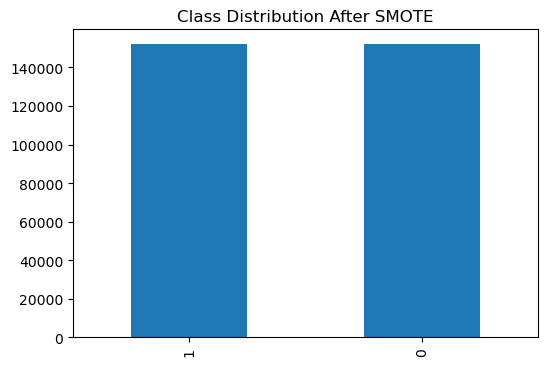

In [114]:
plt.figure(figsize=(6,4))
pd.Series(y_balanced).value_counts().plot(kind='bar', title='Class Distribution After SMOTE')
plt.show()

<B>OBSERVATION

    - Here Our data Is balanced 
    - Scalling the data is not required for the given dataset because we have only limited or very less variations in the feature columns.

### <B>SPLITING DATA INTO TRAINING AND TESTING

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x_balanced,y_balanced,random_state=42,test_size=0.30)

In [116]:
# Check shape of train and test
x_train.shape

(212990, 65)

In [117]:
x_test.shape

(91282, 65)

In [118]:
y_train.shape

(212990,)

In [119]:
y_test.shape

(91282,)

## <B>1) LOGISTIC REGRESSION

In [120]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score ,recall_score

In [121]:
log_reg = LogisticRegression(random_state=42)

In [122]:
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [123]:
y_pred_test_LR = log_reg.predict(x_test)  # Predict on the test data

In [124]:
y_pred_train_LR=log_reg.predict(x_train) #Predict on the train data

#### <B>MODEL EVALUATION

In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,classification_report,mean_squared_error,mean_absolute_error,accuracy_score

In [126]:
log_test_accuracy = accuracy_score(y_pred_test_LR, y_test)

log_train_accuracy=accuracy_score(y_pred_train_LR,y_train)

In [127]:
print("Testing accuracy of Logistic regression model",log_test_accuracy)

Testing accuracy of Logistic regression model 0.5376415941806709


In [128]:
print("Training accuracy of Logistic regression model",log_train_accuracy)

Training accuracy of Logistic regression model 0.5367200338044039


In [129]:
print("Logistic regression training Classification report: \n",classification_report(y_pred_test_LR,y_test))

Logistic regression training Classification report: 
               precision    recall  f1-score   support

           0       0.38      0.55      0.45     31624
           1       0.69      0.53      0.60     59658

    accuracy                           0.54     91282
   macro avg       0.54      0.54      0.53     91282
weighted avg       0.58      0.54      0.55     91282



In [130]:
print("Confusion Matrix:")
print(confusion_matrix(y_pred_test_LR,y_test))

Confusion Matrix:
[[17477 14147]
 [28058 31600]]


<b>PLOTING ROC CURVE

In [131]:
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline

0.5482675720372082


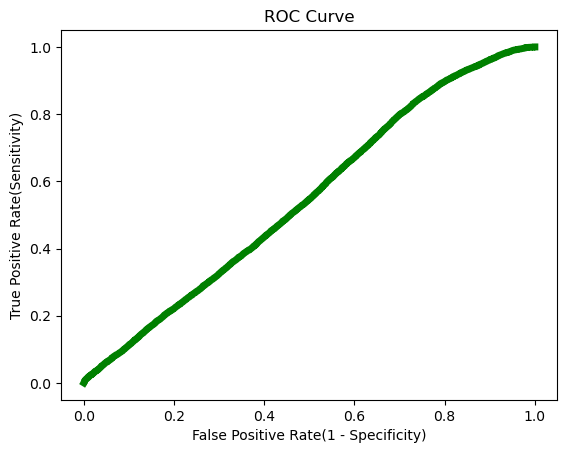

In [132]:
y_predict1 =log_reg .predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_predict1)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr,tpr,color='green',lw=5)
print(roc_auc_score(y_test,y_predict1))
plt.show()

<B>PLOTTING ACTUAL VS PREDICTED VALUE

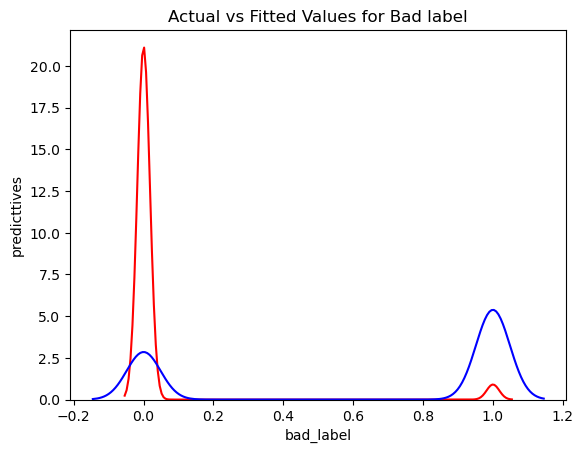

In [133]:
ax1=sns.distplot(df["Bad_label"],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred_test_LR,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Bad label")
plt.xlabel("bad_label")
plt.ylabel("predicttives")

plt.show()
plt.close()

In [134]:
log_f1_score_test = recall_score(y_pred_test_LR,y_test)
print('F1 log test Score',log_f1_score_test*100)

F1 log test Score 52.96858761607831


In [135]:
log_f1_score_train = recall_score(y_pred_train_LR,y_train)
print('F1 log train Score',log_f1_score_train*100)

F1 log train Score 52.76062204346862


In [136]:
LR_gini=2*roc_auc_score(y_test,y_pred_test_LR)-1
LR_gini

np.float64(0.07457032604086522)

 ## <B>2) DECISION TREE

In [137]:
from sklearn.tree import DecisionTreeClassifier

In [138]:
dtc = DecisionTreeClassifier()

In [139]:
dt=DecisionTreeClassifier(max_depth=10, random_state=2)

In [140]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=2)

In [141]:
y_pred_test_DT= dt.predict(x_test)
y_pred_train_DT= dt.predict(x_train)

#### <B>MODEL EVALUATION

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
dt_test_accuracy = accuracy_score(y_pred_test_DT,y_test)
dt_train_accuracy=accuracy_score(y_pred_train_DT,y_train)

In [144]:
print("Testing accuracy of DT model is:",dt_test_accuracy)

Testing accuracy of DT model is: 0.8623167765824588


In [145]:
print("Training accuracy of DT model is:",dt_train_accuracy)

Training accuracy of DT model is: 0.8654819475092728


In [146]:
print("Confusion Matrix:")
print(confusion_matrix(y_pred_test_DT,y_test ))

Confusion Matrix:
[[40483  7516]
 [ 5052 38231]]


In [147]:
print("Classification report of testing:"'\n',classification_report(y_pred_test_DT,y_test))

Classification report of testing:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87     47999
           1       0.84      0.88      0.86     43283

    accuracy                           0.86     91282
   macro avg       0.86      0.86      0.86     91282
weighted avg       0.86      0.86      0.86     91282



In [148]:
dt_f1_score = f1_score(y_pred_test_DT,y_test)
print("F1 score of test DT:",dt_f1_score*100)

F1 score of test DT: 85.8834100864877


In [149]:
dt_f1_score_train = recall_score(y_pred_train_DT,y_train)
print('F1 dt train Score',dt_f1_score_train*100)

F1 dt train Score 88.6433229937167


#### <B>HYPERPARAMETER TUNNING

In [150]:
from sklearn.model_selection import GridSearchCV

In [151]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2', None]
}

In [152]:
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, param_grid, scoring='r2', cv=5, verbose=2)

In [153]:
grid_search.fit(x, y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2; total time=   0.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5; total time=   0.3s
[CV] END max_depth=3, max_fe

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 10, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=2)

In [154]:
best_params = grid_search.best_params_

In [155]:
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [156]:
dtcls=DecisionTreeClassifier(max_depth= 3,max_features='sqrt',min_samples_leaf=4,min_samples_split=2)

In [157]:
dtcls.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', min_samples_leaf=4)

In [158]:
y_predict_DT=dtcls.predict(x_test)

#### <B>MODEL EVALUATION

In [159]:
dt1_acc_sc=accuracy_score(y_predict_DT,y_test)
print(dt1_acc_sc)

0.6927981420214281


In [160]:
dt1_cls_rep=classification_report(y_test,y_predict_DT)
print(dt1_cls_rep)

              precision    recall  f1-score   support

           0       0.67      0.76      0.71     45535
           1       0.72      0.63      0.67     45747

    accuracy                           0.69     91282
   macro avg       0.70      0.69      0.69     91282
weighted avg       0.70      0.69      0.69     91282



In [161]:
DT_gini=2*roc_auc_score(y_test,y_predict_DT)-1
DT_gini

np.float64(0.385904799118715)

<B>PLOTTING ACTUAL VS PREDICTED VALUE

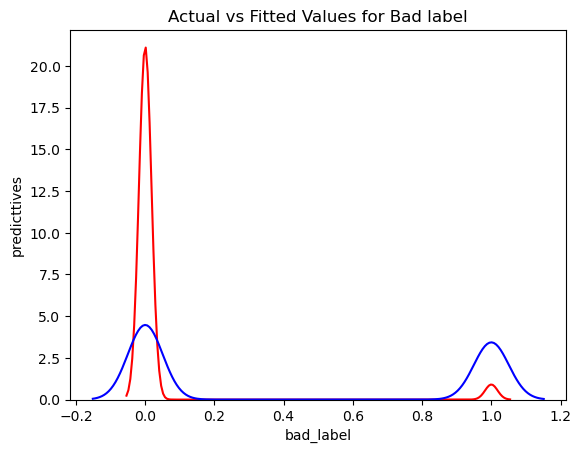

In [162]:
ax1=sns.distplot(df["Bad_label"],hist=False,color="r",label="Actual Values")
sns.distplot(y_predict_DT,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Bad label")
plt.xlabel("bad_label")
plt.ylabel("predicttives")

plt.show()
plt.close()

 ## <B>3) GRADIENT BOOSTING

In [163]:
from sklearn.ensemble import GradientBoostingClassifier

In [164]:
GBC=GradientBoostingClassifier()

In [165]:
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [166]:
y_pred_test_GB= GBC.predict(x_test)
y_pred_train_GB= GBC.predict(x_train)

#### <B>MODEL EVALUATION

In [167]:
from sklearn.metrics import accuracy_score

In [168]:
GBC_test_accuracy = accuracy_score(y_pred_test_GB,y_test)
GBC_train_accuracy=accuracy_score(y_pred_train_GB,y_train)

In [169]:
print("Testing accuracy of DT model is:",GBC_test_accuracy)

Testing accuracy of DT model is: 0.9316075458469358


In [170]:
print("Training accuracy of DT model is:",GBC_train_accuracy)

Training accuracy of DT model is: 0.9312502934410066


In [171]:
print("Confusion Matrix:")
print(confusion_matrix(y_pred_test_GB,y_test ))

Confusion Matrix:
[[44130  4838]
 [ 1405 40909]]


In [172]:
print("Classification report of testing:"'\n',classification_report(y_pred_test_GB,y_test))

Classification report of testing:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93     48968
           1       0.89      0.97      0.93     42314

    accuracy                           0.93     91282
   macro avg       0.93      0.93      0.93     91282
weighted avg       0.93      0.93      0.93     91282



In [173]:
GBC_f1_score = f1_score(y_pred_test_GB,y_test)
print("F1 score of test GBC :",GBC_f1_score*100)

F1 score of test GBC : 92.91059606409193


In [174]:
GBC_f1_score_train = recall_score(y_pred_train_GB,y_train)
print('F1 GBC train Score',GBC_f1_score_train*100)

F1 GBC train Score 96.56495523478897


In [175]:
GB_gini=2*roc_auc_score(y_test,y_pred_test_GB)-1 
GB_gini

np.float64(0.8633890453619919)

<B>PLOTTING ACTUAL VS PREDICTED VALUE

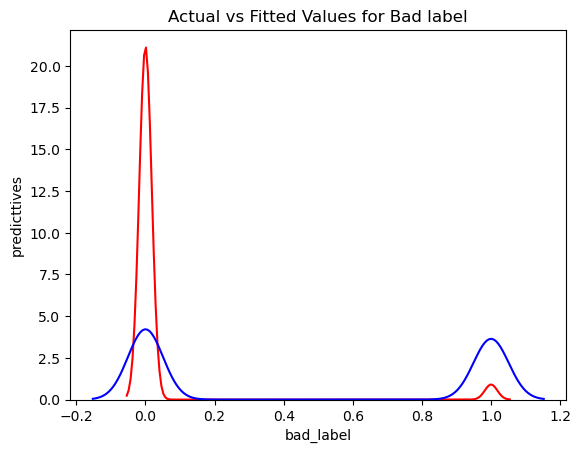

In [176]:
ax1=sns.distplot(df["Bad_label"],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred_test_GB,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Bad label")
plt.xlabel("bad_label")
plt.ylabel("predicttives")

plt.show()
plt.close()

 ## <B>4) KNN CLASSIFIEER

In [177]:
from sklearn.neighbors import KNeighborsClassifier

In [178]:
knn = KNeighborsClassifier()

In [179]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [180]:
y_pred_test_KNN= knn.predict(x_test)
y_pred_train_KNN= knn.predict(x_train)

#### <B>MODEL EVALUATION

In [181]:
from sklearn.metrics import accuracy_score

In [182]:
knn_test_accuracy = accuracy_score(y_pred_test_KNN,y_test)
knn_train_accuracy=accuracy_score(y_pred_train_KNN,y_train)

In [183]:
print("Testing accuracy of Knn model is:",knn_test_accuracy)

Testing accuracy of Knn model is: 0.8686926228610241


In [184]:
print("Training accuracy of Knn model is:",knn_train_accuracy)

Training accuracy of Knn model is: 0.9061646086670736


In [185]:
print("Confusion Matrix:")
print(confusion_matrix(y_pred_test_KNN,y_test ))

Confusion Matrix:
[[34292   743]
 [11243 45004]]


In [186]:
print("Classification report of testing:"'\n',classification_report(y_pred_test_KNN,y_test))

Classification report of testing:
               precision    recall  f1-score   support

           0       0.75      0.98      0.85     35035
           1       0.98      0.80      0.88     56247

    accuracy                           0.87     91282
   macro avg       0.87      0.89      0.87     91282
weighted avg       0.90      0.87      0.87     91282



In [187]:
knn_f1_score = f1_score(y_pred_test_KNN,y_test)
print("F1 score of test knn :",knn_f1_score*100)

F1 score of test knn : 88.2483283330392


In [188]:
knn_f1_score_train = recall_score(y_pred_train_KNN,y_train)
print('F1 knn train Score',knn_f1_score_train*100)

F1 knn train Score 84.68189298759684


In [189]:
print(roc_auc_score(y_test,y_predict1))

0.5482675720372082


<B>OBSERVATION

    - Our KNN model's prediction accuracy score is 96%. so our linear regression model accounts for approximately 96% of the variance.

In [190]:
KNN_gini=2*roc_auc_score(y_test,y_pred_test_KNN)-1 
KNN_gini

np.float64(0.7368495267038784)

<B>PLOTTING ACTUAL VS PREDICTED VALUE

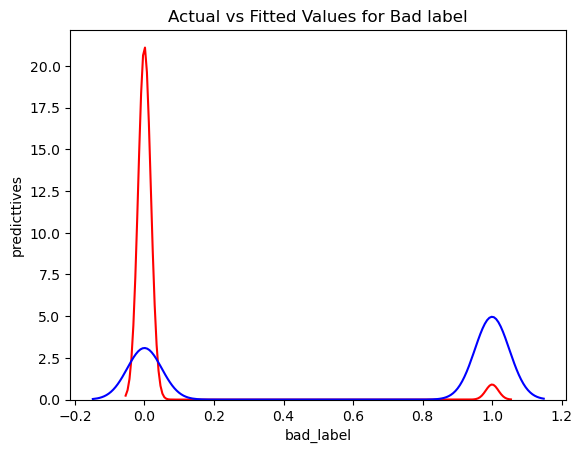

In [191]:
ax1=sns.distplot(df["Bad_label"],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred_test_KNN,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Bad label")
plt.xlabel("bad_label")
plt.ylabel("predicttives")

plt.show()
plt.close()

 ## <B>5) RANDOM FOREST CLASSIFIEER

In [192]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
RVC=RandomForestClassifier()

In [194]:
RVC.fit(x_train, y_train)

RandomForestClassifier()

In [195]:
y_pred_test_RF= RVC.predict(x_test)
y_pred_train_RF= RVC.predict(x_train)

#### <B>MODEL EVALUATION

In [196]:
from sklearn.metrics import accuracy_score

In [197]:
RVC_test_accuracy = accuracy_score(y_pred_test_RF,y_test)
RVC_train_accuracy=accuracy_score(y_pred_train_RF,y_train)

In [198]:
print("Testing accuracy of Knn model is:",RVC_test_accuracy)

Testing accuracy of Knn model is: 0.9970749983567406


In [199]:
print("Training accuracy of Knn model is:",RVC_train_accuracy)

Training accuracy of Knn model is: 1.0


In [200]:
print("Confusion Matrix:")
print(confusion_matrix(y_pred_test_RF,y_test ))

Confusion Matrix:
[[45512   244]
 [   23 45503]]


In [201]:
print("Classification report of testing:"'\n',classification_report(y_pred_test_RF,y_test))

Classification report of testing:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     45756
           1       0.99      1.00      1.00     45526

    accuracy                           1.00     91282
   macro avg       1.00      1.00      1.00     91282
weighted avg       1.00      1.00      1.00     91282



In [202]:
RVC_f1_score = f1_score(y_pred_test_RF,y_test)
print("F1 score of test knn :",RVC_f1_score*100)

F1 score of test knn : 99.70747099361257


In [203]:
RVC_f1_score_train = recall_score(y_pred_train_RF,y_train)
print('F1 knn train Score',RVC_f1_score_train*100)

F1 knn train Score 100.0


In [204]:
RF_gini=2*roc_auc_score(y_test,y_pred_test_RF)-1
RF_gini

np.float64(0.9941612109545097)

<B>PLOTTING ACTUAL VS PREDICTED VALUE

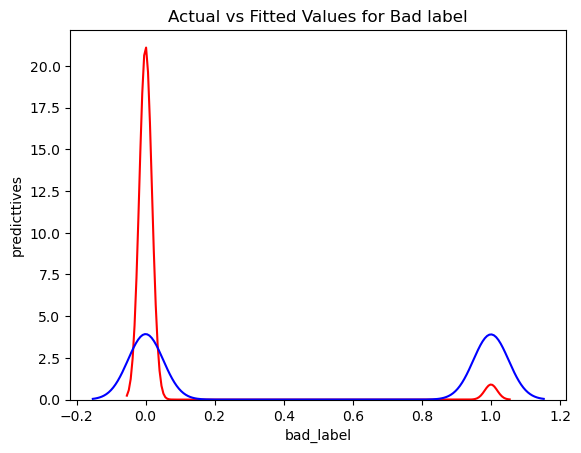

In [205]:
ax1=sns.distplot(df["Bad_label"],hist=False,color="r",label="Actual Values")
sns.distplot(y_pred_test_RF,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Bad label")
plt.xlabel("bad_label")
plt.ylabel("predicttives")

plt.show()
plt.close()

### <B>CREATE A DATAFRAME FOR TRAINING AND TESTING MODEL COMPARISON

In [206]:
# Create a DataFrame for model comparison
models_comparison = {
    "Model": ["Logistic Regression","Decision Tree Classifier","Gradient Boosting","KNN Classifier","Random Forest Classification "],
    "Train F1 Score": [52.76, 88.64, 96.56,84.68,100],
    "Test F1 Score": [ 52.96, 85.88, 92.91,88.24,99.71],
    "Gini Value" : [ 0.07459218539776291, 0.368230768580293, 0.8633890453619919, 0.7368495267038784, 0.9946429309814944]
}

# Convert dictionary to a DataFrame
metrics_df = pd.DataFrame(models_comparison)

# Display the table
metrics_df

Model  Train F1 Score  Test F1 Score  Gini Value
0            Logistic Regression           52.76          52.96    0.074592
1       Decision Tree Classifier           88.64          85.88    0.368231
2              Gradient Boosting           96.56          92.91    0.863389
3                 KNN Classifier           84.68          88.24    0.736850
4  Random Forest Classification           100.00          99.71    0.994643

#### <b>MODEL COMPARISON BY F1 TEST SCORE

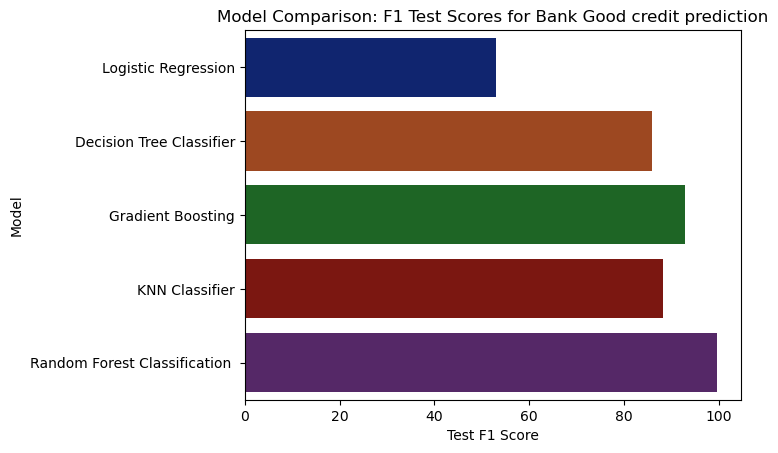

In [207]:
sns.barplot(x="Test F1 Score", y="Model", data=metrics_df, palette="dark")
plt.title("Model Comparison: F1 Test Scores for Bank Good credit prediction")
plt.show()

#### <b>TRAIN VS TEST F1 SCORES BY MODEL

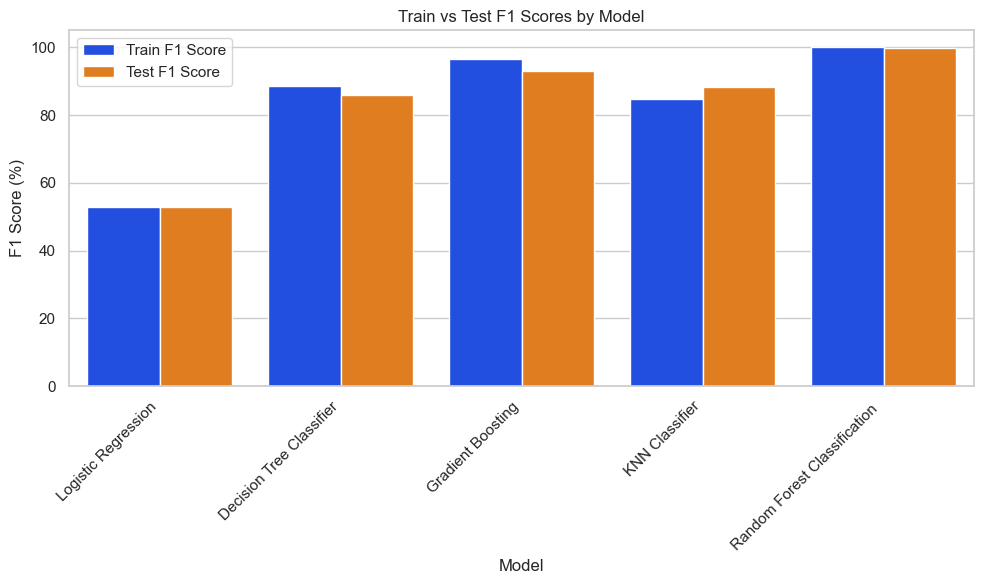

In [208]:
f1_df = metrics_df.melt(
    id_vars="Model",
    value_vars=["Train F1 Score", "Test F1 Score"],
    var_name="Dataset",
    value_name="F1 Score"
)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=f1_df, x="Model", y="F1 Score", hue="Dataset", palette= "bright")
plt.xticks(rotation=45, ha='right')
plt.title("Train vs Test F1 Scores by Model")
plt.ylabel("F1 Score (%)")
plt.xlabel("Model")
plt.legend(title="")

plt.tight_layout()
plt.show()

#### <b>GINI COEFFICIENT BY MODEL

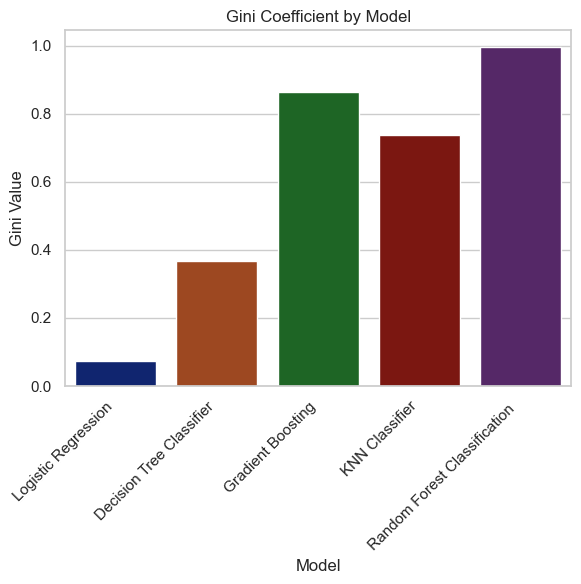

In [209]:
plt.figure(figsize=(6, 6))
sns.barplot(data=metrics_df, x="Model", y="Gini Value", palette="dark")

# Customize
plt.title("Gini Coefficient by Model")
plt.xlabel("Model")
plt.ylabel("Gini Value")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## <b>MODEL SUMMARY 
#### <B>1) Random Forest Classifier:
    - Highest Train F1 (100%) and Test F1 (99.71%).
    - Near-perfect Gini (0.9946).
    - Possible overfitting, though generalization seems strong based on test score.

#### <B>2) Gradient Boosting:
    - Very strong performance across the board: Train F1 (96.56%), Test F1 (92.91%), and Gini (0.8634).
    - Balanced and powerful model with good generalization.

#### <B>3) KNN Classifier:
    - Surprisingly strong Test F1 (88.24%) and Gini (0.7369).
    - Lower Train F1 (84.68%), which may indicate slight underfitting or good generalization.

#### <B>4) Decision Tree Classifier:
    - Moderate performance: Test F1 (85.88%), Gini (0.3682).
    - Likely overfitting (Train F1: 88.64% vs. lower Gini).

#### <B>5) Logistic Regression:
    - Weakest performance: F1 Scores ~52%, Gini only 0.0746.
    - Performs only slightly better than random — not suitable for this problem.

## <B>Final Conclusion:
    - Best Overall Model: Random Forest, due to top performance on both F1 score and Gini.
    - Most Balanced Alternative: Gradient Boosting, offering high accuracy with strong generalization and excellent rank ordering.
    - Avoid Using: Logistic Regression, due to poor classification and discrimination.
    - If model interpretability is important, Gradient Boosting (with tools like SHAP) could be preferred over Random Forest, which is more complex but slightly more powerful.

### <b>SAVE AND LOAD MODEL

In [210]:
import pickle

filename = 'Bank_Good_Credit_Prediction_Project.pkl'
with open(filename, 'wb') as f:
    pickle.dump(RVC,f)
print("Model saved successfully!")

Model saved successfully!


### <B>LOADING MODEL

In [211]:
with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)
predictions = loaded_model.predict(x_test)
print(predictions)

[0 1 1 ... 1 1 1]


In [218]:
df.head(4)
#df_merged['Bad_label']

customer_no  acct_type  high_credit_amt  cur_balance_amt  feature_1  \
0        12265          6          20900.0                0          4   
1        12265         10          16201.0            10390          4   
2        12265         10          41028.0            34420          4   
3        15606          6          20250.0            13500          7   

   feature_3  feature_7  feature_12  feature_13  feature_14  feature_16  \
0          0        214           8           6           2         207   
1          0        214           8           6           2         207   
2          0        214           8           6           2         207   
3        118         11          15           0           1         288   

   feature_25  feature_26  feature_27  feature_28  feature_29  feature_30  \
0           1           1           6          43          79          21   
1           1           1           6          43          79          21   
2           1           1           6          43          79          21   
3           1           4           0          26         568          49   

   feature_32  feature_34  feature_35  feature_36  feature_37  feature_38  \
0           5           2           1           0           0           0   
1           5           2           1           0           0           0   
2           5           2           1           0           0           0   
3           3           1        2572           7           2        4144   

   feature_39  feature_40  feature_41  feature_43  feature_44  feature_48  \
0           1           1           1          48          80           0   
1           1           1           1          48          80           0   
2           1           1           1          48          80           0   
3          12           9           4          32         588           0   

   feature_50  feature_51  feature_52  feature_56  feature_64  feature_65  \
0           1           0           1           1           1          55   
1           1           0           1           1           1          55   
2           1           0           1           1           1          55   
3           2           9         476           5          10          40   

   feature_66  feature_68  feature_69  feature_71  feature_72  feature_79  \
0          79           2           1           1           2           1   
1          79           2           1           1           2           1   
2          79           2           1           1           2           1   
3        1745           1        2572           5           2           1   

   Bad_label  dt_opened_x_year  dt_opened_x_month  dt_opened_x_day  \
0          1              2015                 11               10   
1          1              2015                 11               10   
2          1              2015                 11               10   
3          0              2015                  7               20   

   upload_dt_year  upload_dt_month  upload_dt_day  opened_dt_year  \
0            2015               10             20            2013   
1            2015               10             20            2012   
2            2015               10             20            2012   
3            2015                7              9            2015   

   opened_dt_month  opened_dt_day  last_paymt_dt_year  last_paymt_dt_month  \
0                6              9                2014                    6   
1                5             25                2015                    9   
2                3             22                2015                    8   
3                1             18                2015                    5   

   last_paymt_dt_day  reporting_dt_year  reporting_dt_month  reporting_dt_day  \
0                 30               2015                   9                30   
1                  6               2015                  10                 

### <B>MAKING PREDICTION

In [219]:
input_data = np.array([
   15606, 6, 20250.0, 13500, 7, 118, 11, 15, 0, 1, 288, 1, 4, 0, 26, 568, 49, 3, 1, 2572, 7, 2, 4144, 12, 9, 4, 32, 588, 0, 2, 9, 476, 5, 10, 40, 1745, 1, 2572, 5, 2, 1, 2015, 7, 20, 2015, 7, 9, 2015, 1, 18, 2015, 5, 5, 2015, 5, 31, 2015, 5, 1, 2015, 1, 1, 2015, 7, 3
])
# Reshape to 2D (1 row, N columns) 
input_data = input_data.reshape(1, -1) 

prediction = RVC.predict(input_data)
print(prediction)

[0]


# <b>FINAL PROJECT REPORT

## <b>UNDERSTANDING THE PROBLEM

### <b>1) CHALLENGES

    - Clearly defining the goal was important to ensure we built the right model.

    - Understanding banking terms like "30 DPD+ bucket" was tricky.

    - We had to carefully classify customers as "good" or "bad" based on credit history.

    - Financial History: Credit balance, high credit amount, and payment history.

    - Demographic Information: Age, location, and customer ID.

    - Transaction Details: Account type, reporting date, and account opening date.

    - Target Variable: Bad_label (1 = Bad credit, 0 = Good credit)

### <b>2) UNDERSTANDING AND CHALLENGES IN DATASET

    - The dataset was large, so it took time to load.

    - We had to check for missing values and incorrect data types.

    - Some data entries were duplicated or wrongly classified.

### <b>3) CHECKING FOR MISSING VALUES

    - Identifying which columns had missing values.

    - Deciding how to handle missing data (filling with average values or removing rows).

### <b>4) CHECKING AND CONVERTING DATA-TYPE

    - Some numbers were stored as text, which could cause errors.

    - We had to convert categorical data into numerical.

### <b>5) DATA PREPROCESSING

#### <b>A) REMOVING DUPLICATE RECORDS
    - Finding and removing duplicate rows to avoid incorrect model training.
#### <B>B) EXPLORATORY DATA ANALYSIS (EDA)
    - Choosing the best graphs and charts to understand the data.
    - Used histograms to analyze the distribution of numerical
    - Used countplot for catagorical to analyse the distribution
    - Finding outliers but we didn’t handle outliers because some outliers were imp for this project
    - Understanding relationships between different factors affecting credit score.
#### <B>C) PREPARING DATA FOR THE MODELTRAINING
    - checked high correlation and remove above >90
    - Removed unwanted columns and merged data
    - In a Texas Employee Salary Prediction dataset, checking and handling outliers might not be important
    - The outliers represent valid data points (e.g., high salaries for senior staff or low salaries for part-time employees), and removing them would lead to a loss of valuable information
    - So we did not handle Outliers
    - Sacling the data is not required for the given dataset because we have only limited or very less variations in the feature columns.
#### <B>D) CHECKING FOR IMBALANCE
    - The dataset had more "good" credit cases than "bad" ones.
    - We had to balance the data using techniques like SMOTE or undersampling.

### <B>6) MODEL TRAINING
#### <B>A) SPLITING DATA INTA TRAINING AND TESTING SETS
    - Deciding how much data to use for training and testing.
    - The dataset was split into training (80%) and testing (20%) sets.
#### <B>B) CHOOSING AND TRAINING MODEL
    - Selecting the best model for eg. Logistic Regression, Decision Tree, Random Forest.
    - Some models gives overfitting
#### <B>C) CHECKING MODEL PERFORMANCE
    - Understanding how well the model worked using Accuracy, F1-score, and AUC-ROC.
#### <B>D) FINE TUNNING THE MODEL
    - Choosing the best settings for the model (like tree depth and learning rate).
    - Running multiple tests without making the model too complex.
    - Saving the Model for Future Use
#### <B>E) FINAL MODEL AND PERFORMANCE
    - Final Model Chosen: Random Forest (best accuracy & AUC-ROC score).
    - Evaluation: Balanced accuracy, reduced overfitting, and performed well on new data.

### <b>7) MODEL SUMMARY 
#### <B>A) Random Forest Classifier:
    - Highest Train F1 (100%) and Test F1 (99.71%).
    - Near-perfect Gini (0.9946).
    - Possible overfitting, though generalization seems strong based on test score.

#### <B>B) Gradient Boosting:
    - Very strong performance across the board: Train F1 (96.56%), Test F1 (92.91%), and Gini (0.8634).
    - Balanced and powerful model with good generalization.

#### <B>C) KNN Classifier:
    - Surprisingly strong Test F1 (88.24%) and Gini (0.7369).
    - Lower Train F1 (84.68%), which may indicate slight underfitting or good generalization.

#### <B>D) Decision Tree Classifier:
    - Moderate performance: Test F1 (85.88%), Gini (0.3682).
    - Likely overfitting (Train F1: 88.64% vs. lower Gini).

#### <B>E) Logistic Regression:
    - Weakest performance: F1 Scores ~52%, Gini only 0.0746.
    - Performs only slightly better than random — not suitable for this problem.

### <B>8) Final Conclusion:
    - Best Overall Model: Random Forest, due to top performance on both F1 score and Gini.
    - Most Balanced Alternative: Gradient Boosting, offering high accuracy with strong generalization and excellent rank ordering.
    - Avoid Using: Logistic Regression, due to poor classification and discrimination.
    - If model interpretability is important, Gradient Boosting (with tools like SHAP) could be preferred over Random Forest, which is more complex but slightly more powerful.

# <b>END OF PROJECT
<b> Siddheshwar Koli

# <b>THANK YOU